# Myanmar Food Price Analysis (Step-by-Step)
Interactive notebook to run the analysis one visualization at a time.

In [2]:

import warnings
warnings.filterwarnings('ignore')
from IPython.display import display, Image, HTML

import pandas as pd
from analysis import (
    DATA_PATH, FIG_DIR, MAP_DIR,
    ensure_output_dirs, load_and_clean, describe_dataset,
    plot_price_distributions, national_trends, staple_trends, seasonality_plot,
    regional_analysis, volatility_analysis, price_shocks, currency_divergence,
    correlation_analysis, cluster_markets, forecast_commodity,
)
ensure_output_dirs()


## Load & Clean

In [3]:

df = load_and_clean(DATA_PATH)
summary = describe_dataset(df)
display(summary)
print('Rows:', summary.rows, 'Markets:', summary.markets, 'Commodities:', summary.commodities)
print('Date range:', summary.date_min.date(), 'to', summary.date_max.date())


DatasetSummary(rows=38629, cols=24, markets=264, commodities=17, date_min=Timestamp('2008-01-15 00:00:00'), date_max=Timestamp('2025-09-15 00:00:00'))

Rows: 38629 Markets: 264 Commodities: 17
Date range: 2008-01-15 to 2025-09-15


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38629 entries, 1 to 38629
Data columns (total 24 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             38629 non-null  datetime64[ns]
 1   admin1           38629 non-null  object        
 2   admin2           38629 non-null  object        
 3   market           38629 non-null  object        
 4   market_id        38629 non-null  object        
 5   latitude         38629 non-null  float64       
 6   longitude        38629 non-null  float64       
 7   category         38629 non-null  object        
 8   commodity        38629 non-null  object        
 9   commodity_id     38629 non-null  object        
 10  unit             38629 non-null  object        
 11  priceflag        38629 non-null  object        
 12  pricetype        38629 non-null  object        
 13  currency         38629 non-null  object        
 14  price            38629 non-null  float64   

## Descriptive Statistics

In [4]:

price_stats = df[["price", "usdprice"]].describe()
top_comms = df["commodity_clean"].value_counts()
top_markets = df["market_clean"].value_counts()
display(price_stats)
display(top_comms.head(10).to_frame('count'))
display(top_markets.head(10).to_frame('count'))


,price,usdprice
count,38629.000000,38629.000000
mean,2313.075032,1.369383
std,2659.601616,1.463716
min,3.000000,0.002000
25%,687.000000,0.480000
50%,1515.150000,0.970000
75%,2809.000000,1.650000
max,60000.000000,50.630000


,count
commodity_clean,
Rice,6892
Salt,6052
Palm Oil,4877
Pulses,4869
Onions,4016
Eggs,3628
Tomatoes,2924
Fuel,1197
Wage,1175


,count
market_clean,
Lashio Market,769
Buthidaung,618
Hakha Myoma Market,569
Pakokku Myo Ma Market,567
Kutkai,561
Momauk,532
Manton,507
Tonzang,496
Shwegu,488


## Price Distributions

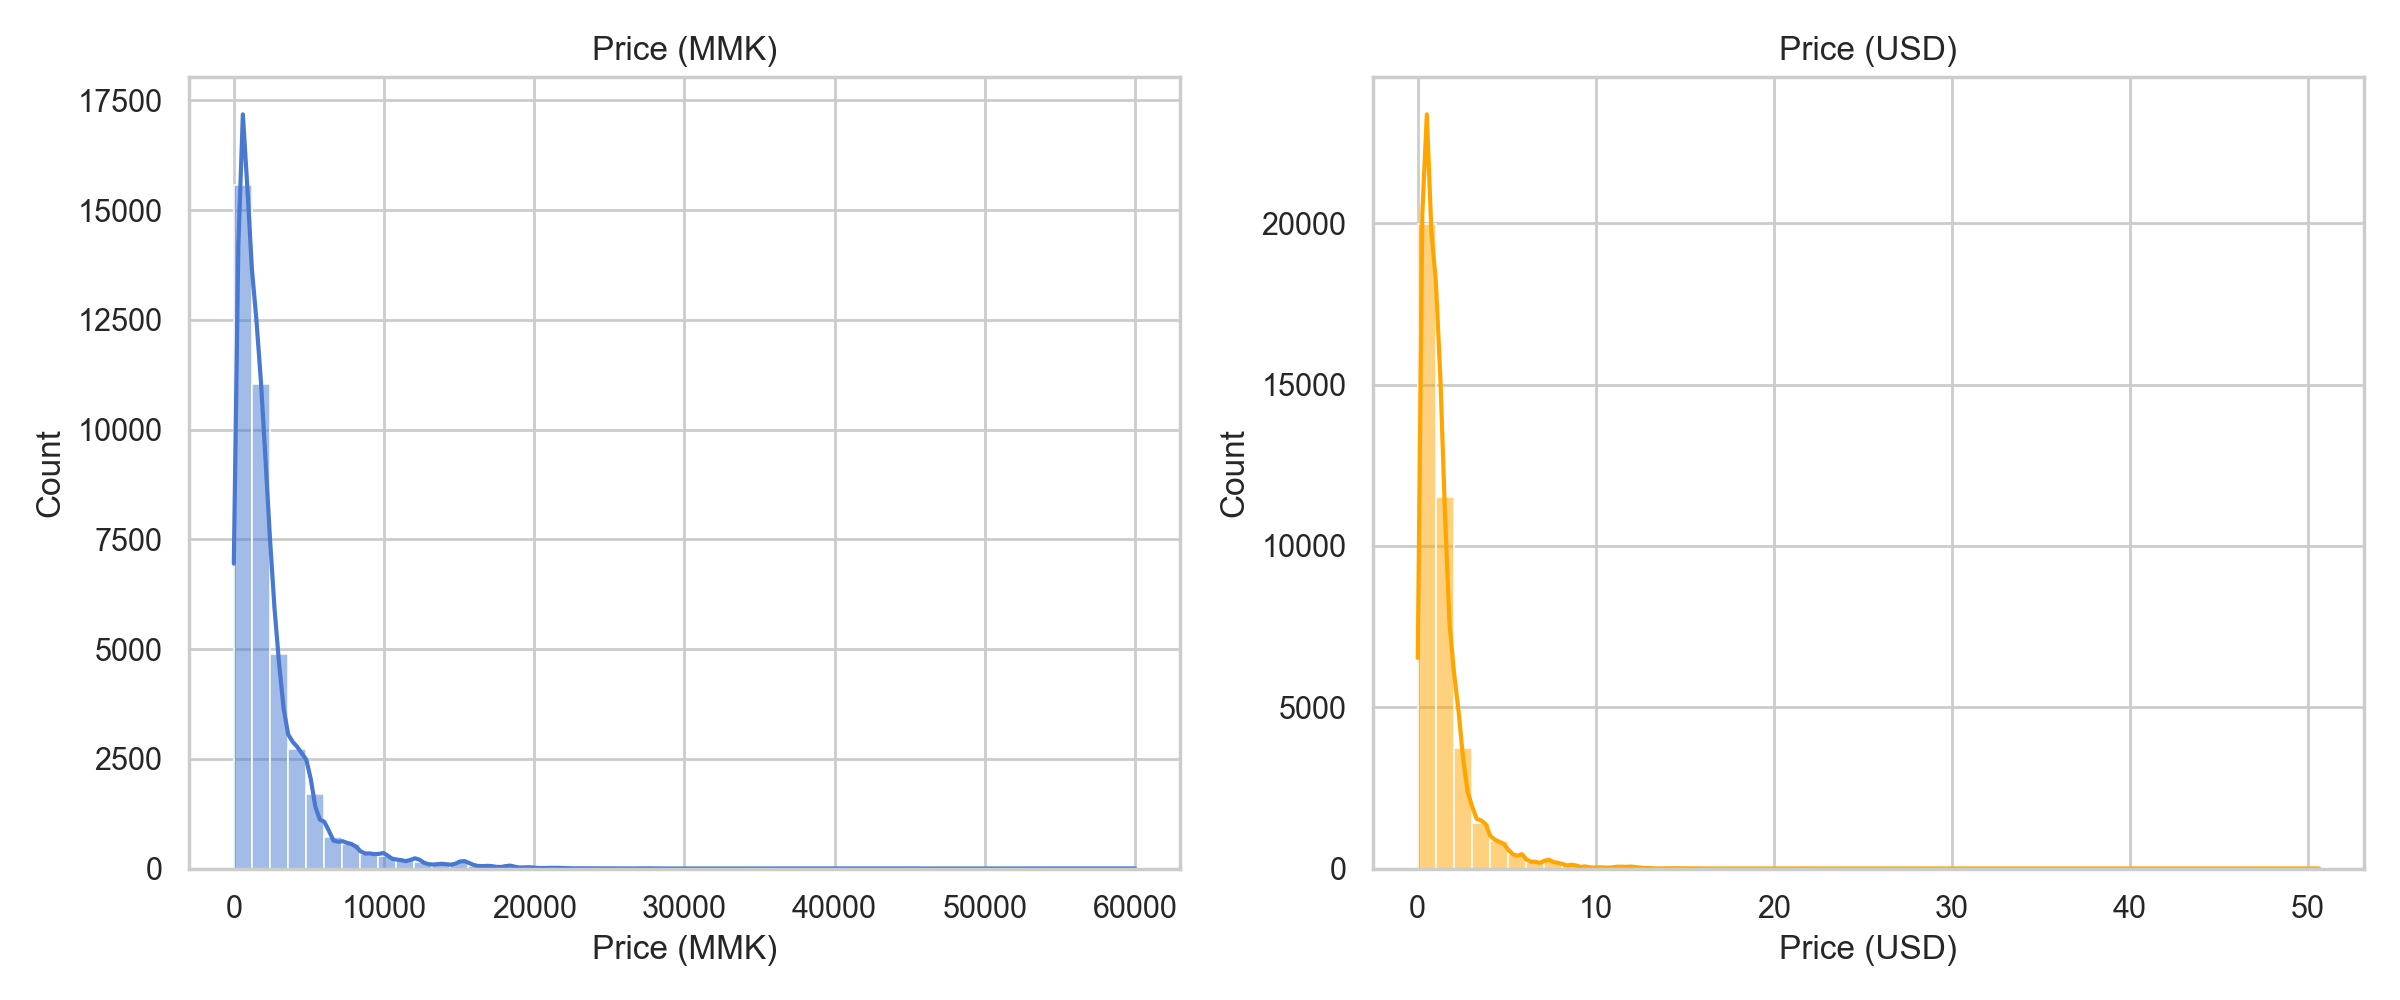

In [5]:

paths = plot_price_distributions(df)
for p in paths:
    display(Image(filename=p))


## National Trend

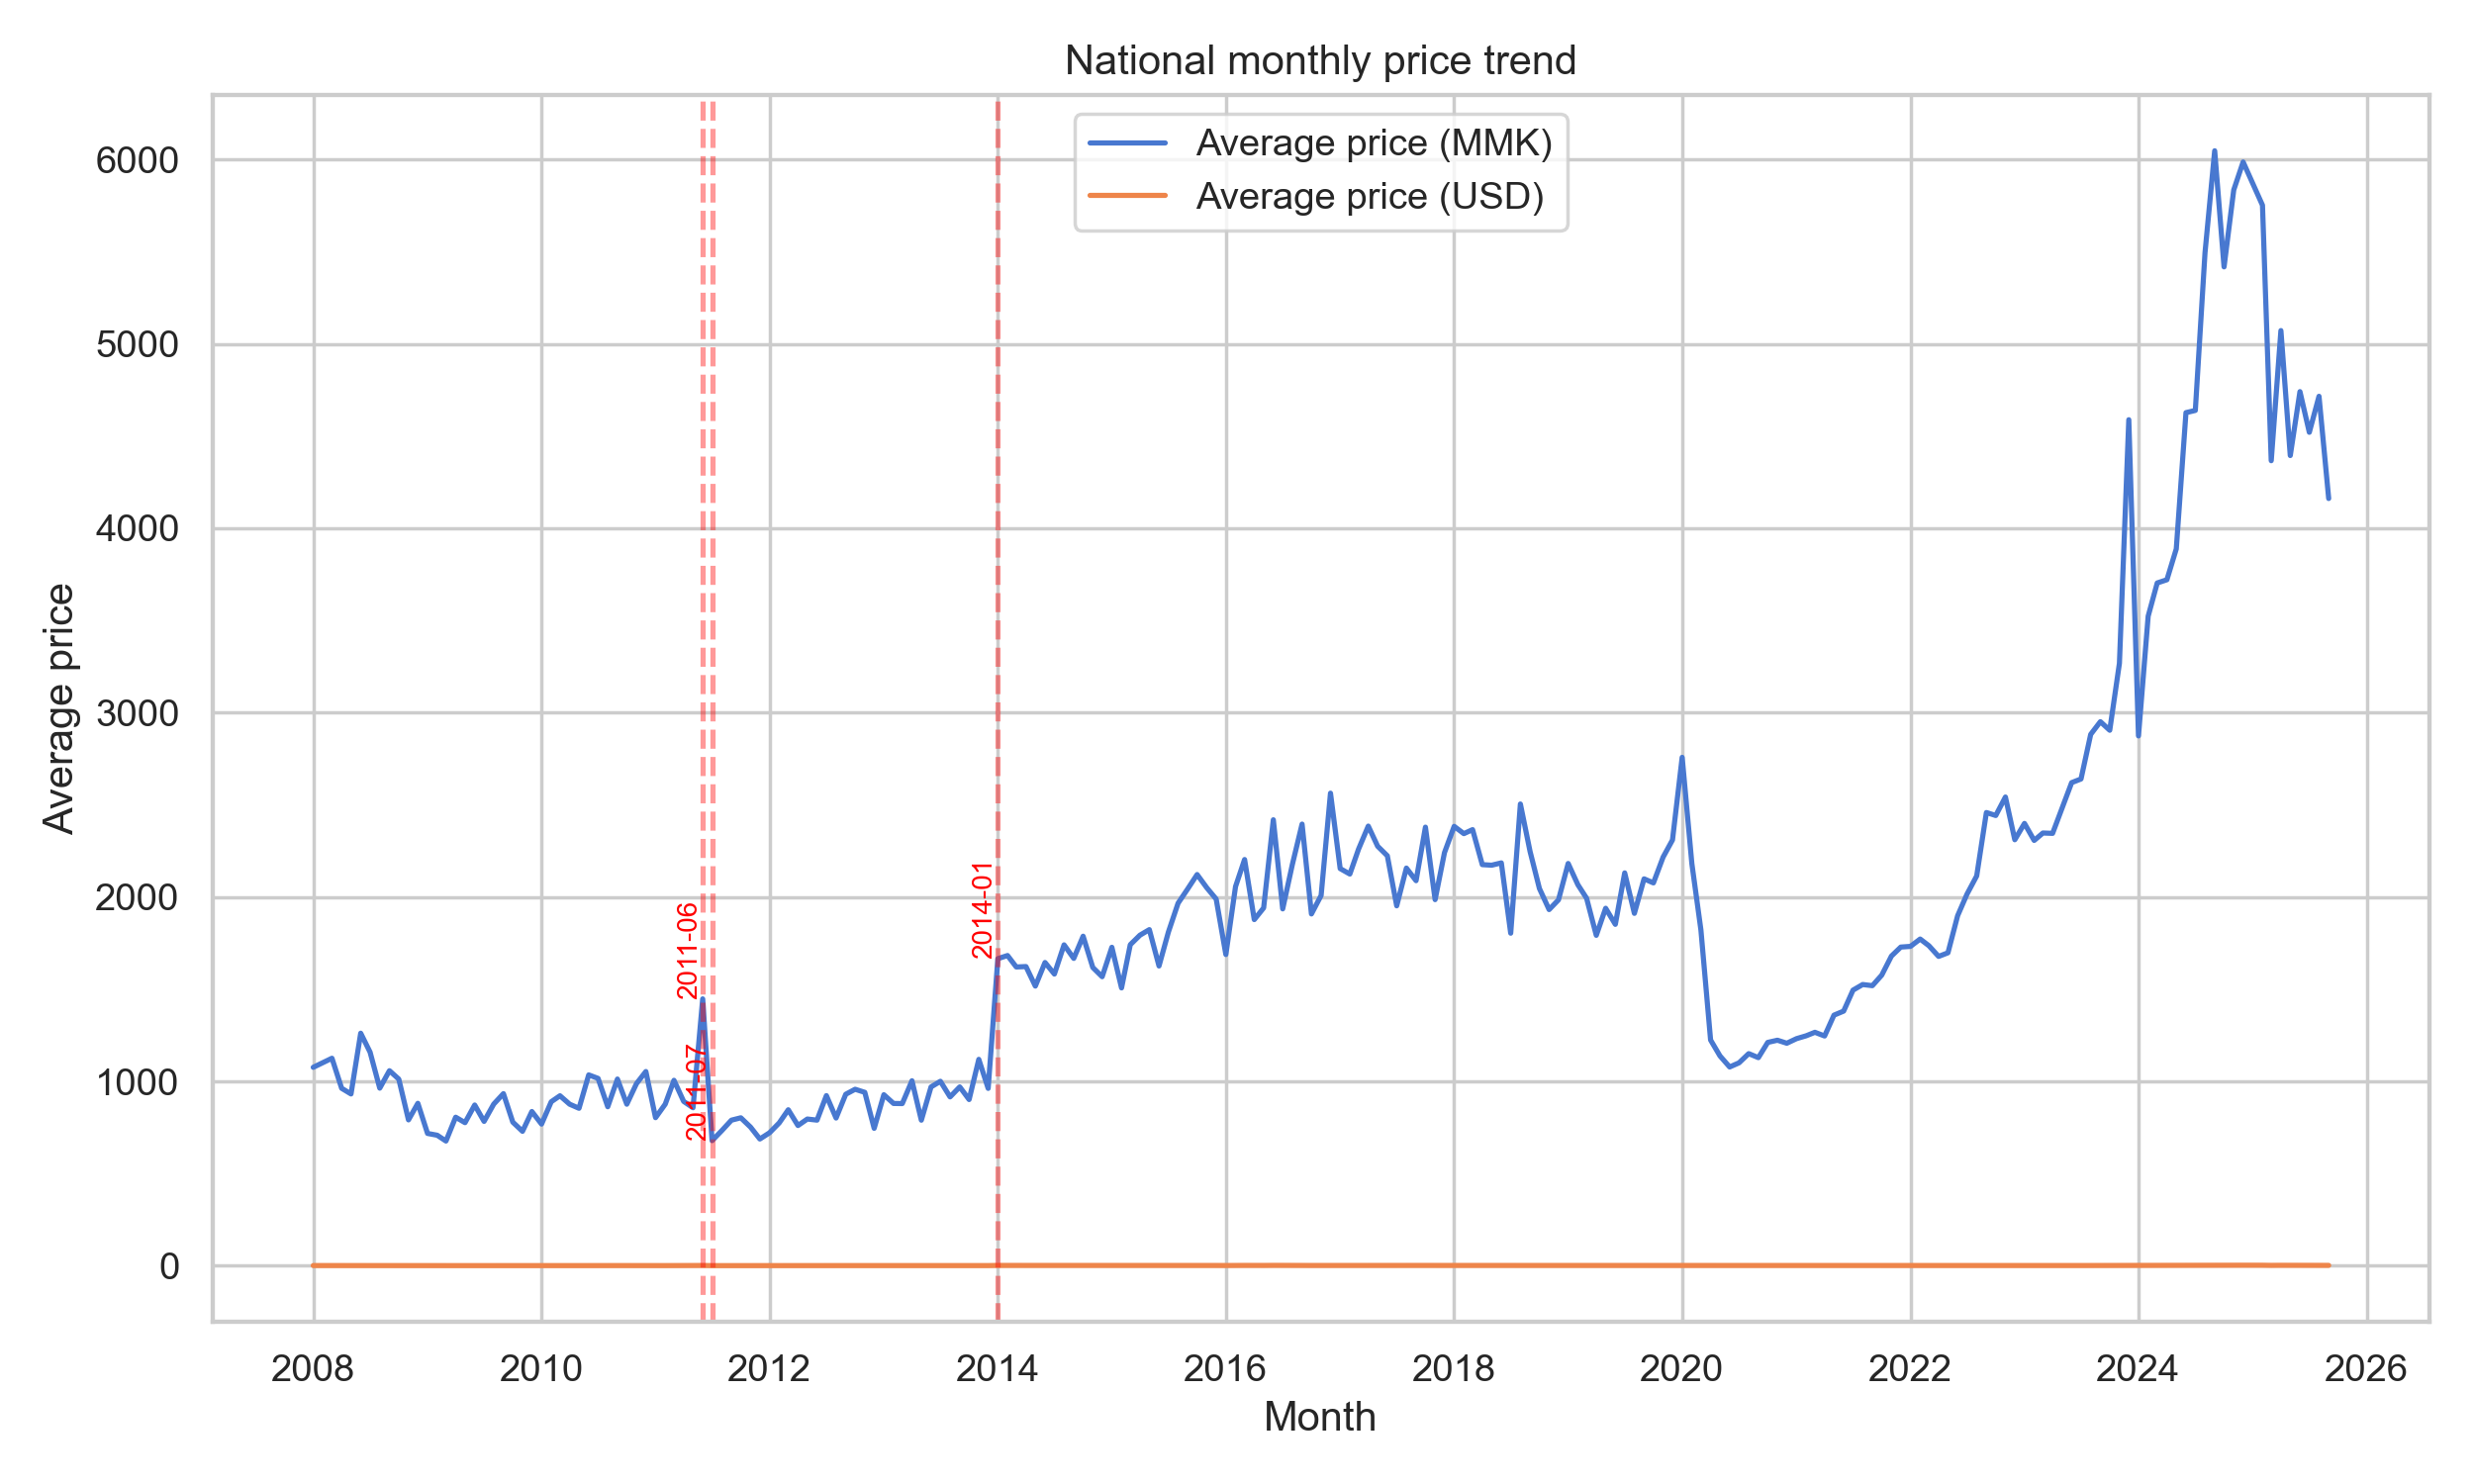

In [6]:

monthly, paths = national_trends(df)
monthly.tail()
for p in paths:
    display(Image(filename=p))


## Staple Trends

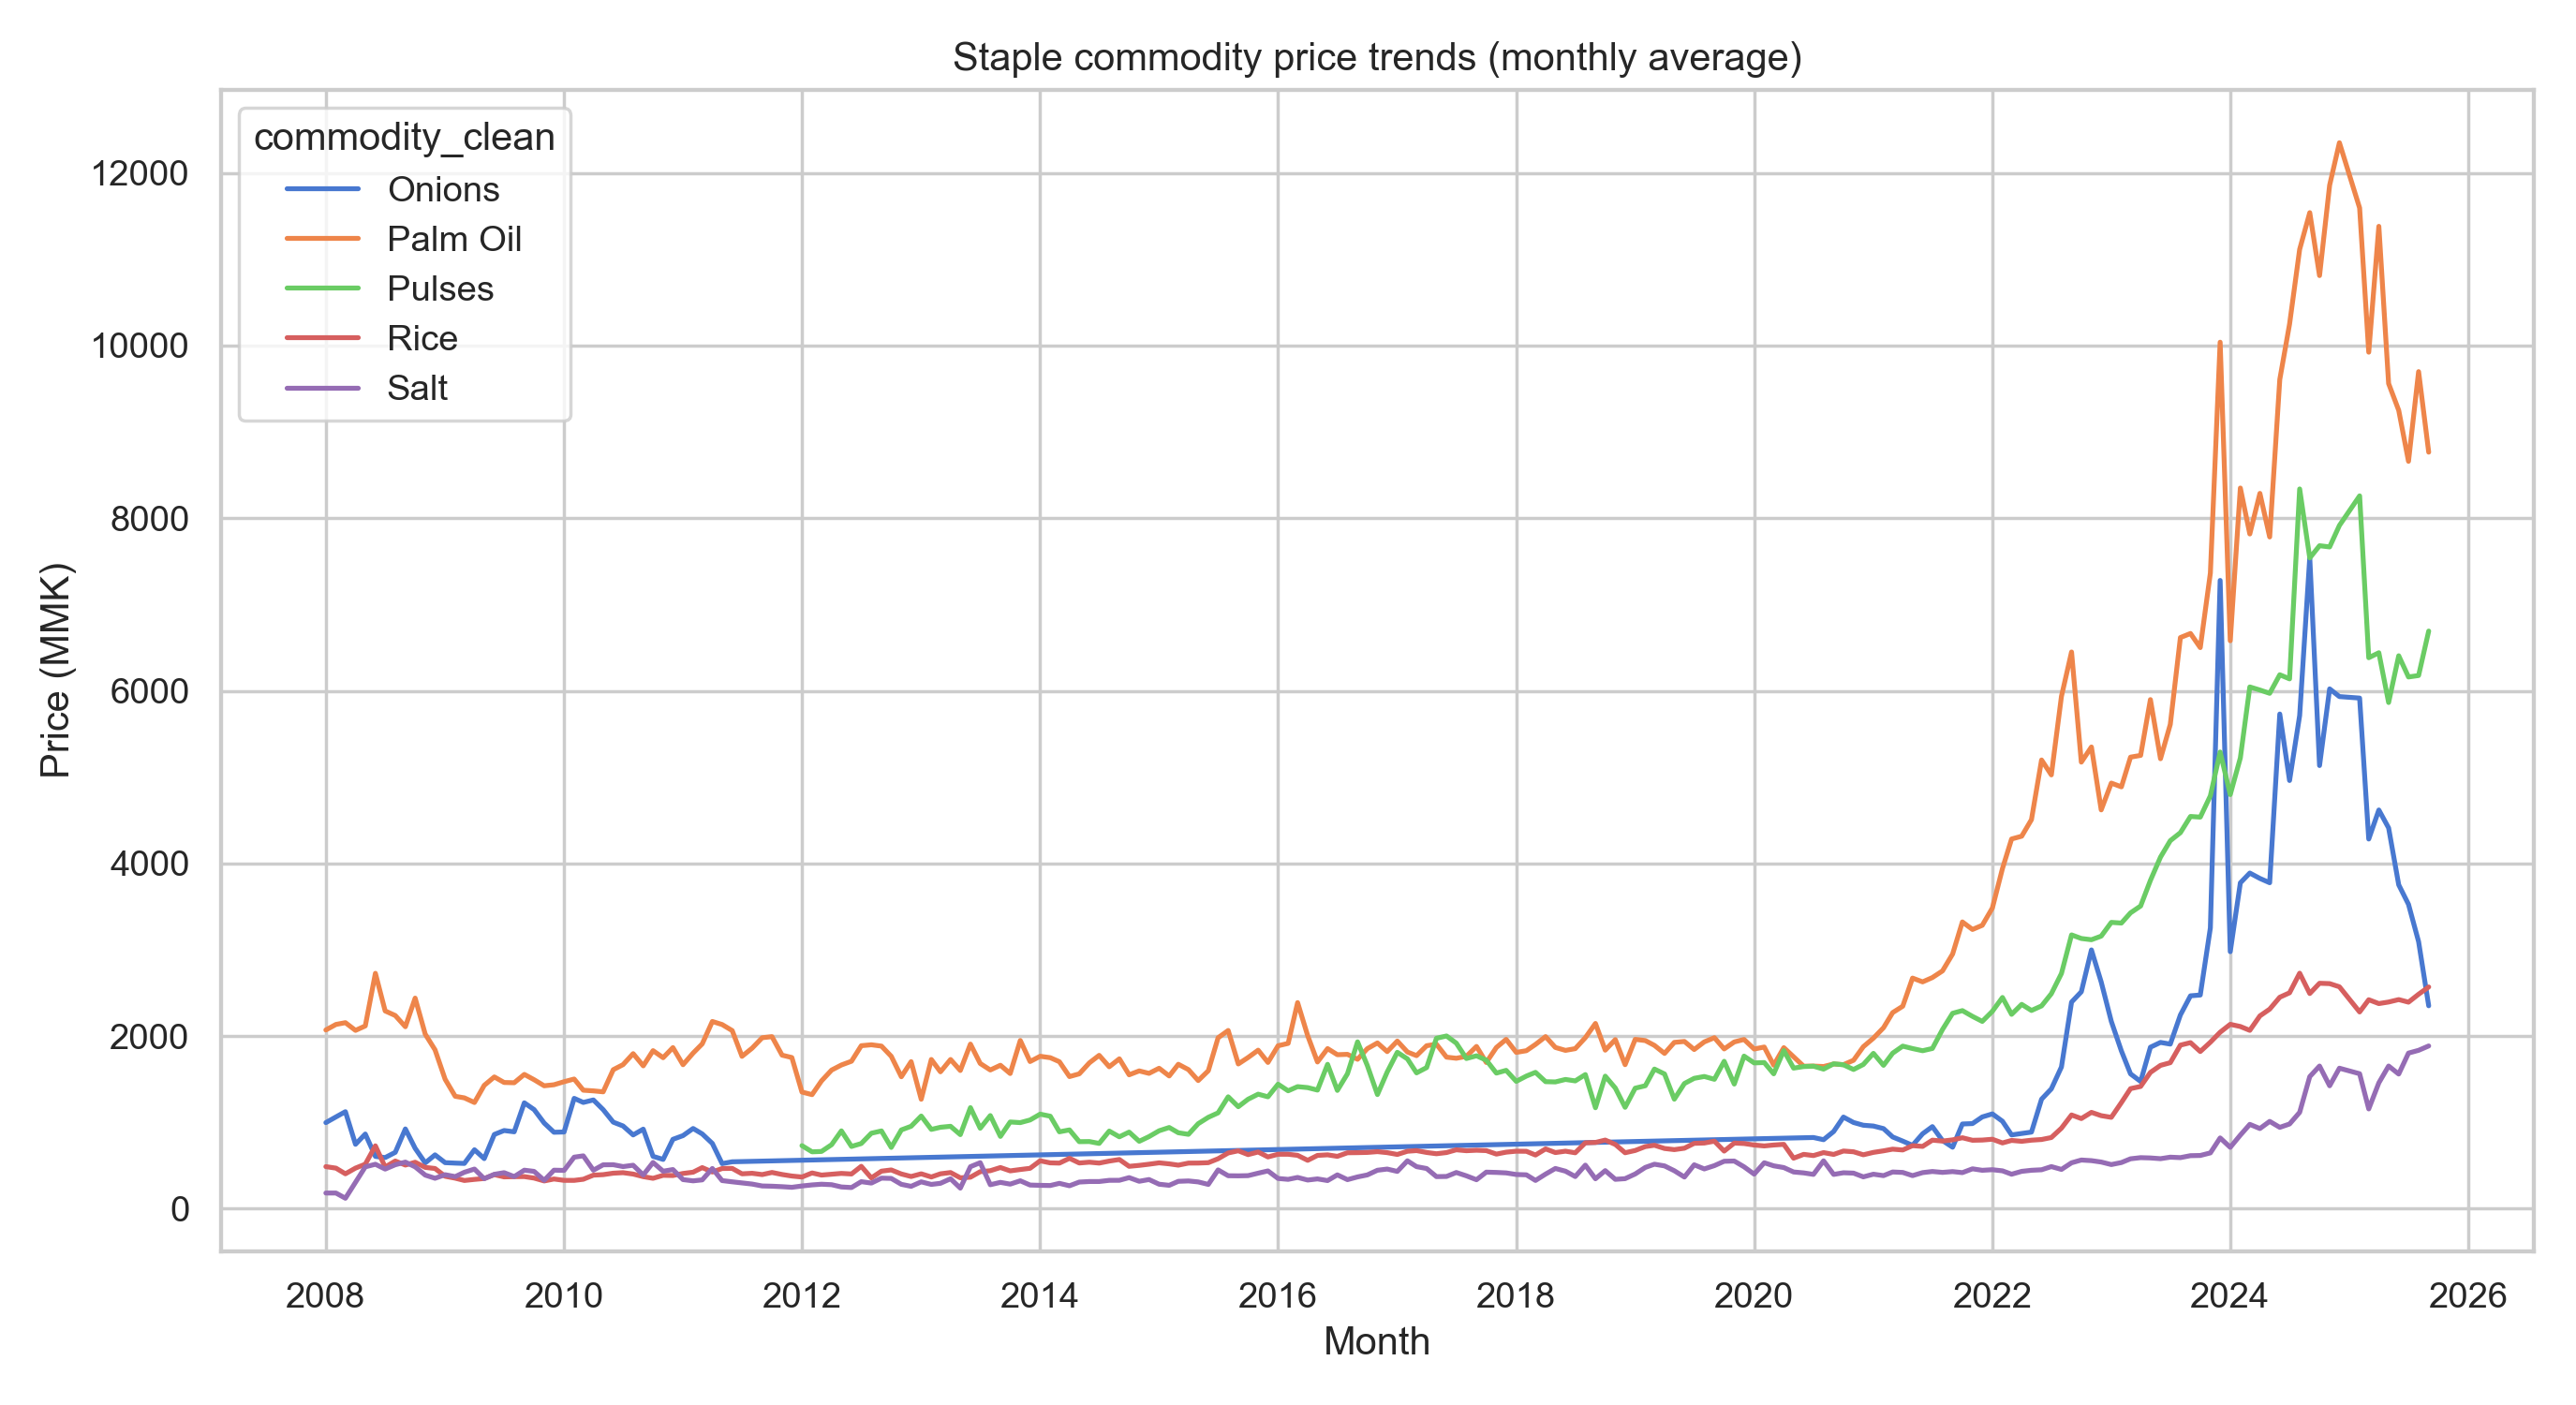

In [7]:

staples = ["Rice", "Palm Oil", "Onions", "Salt", "Pulses"]
paths = staple_trends(df, staples)
for p in paths:
    display(Image(filename=p))


## Seasonality (Onions)

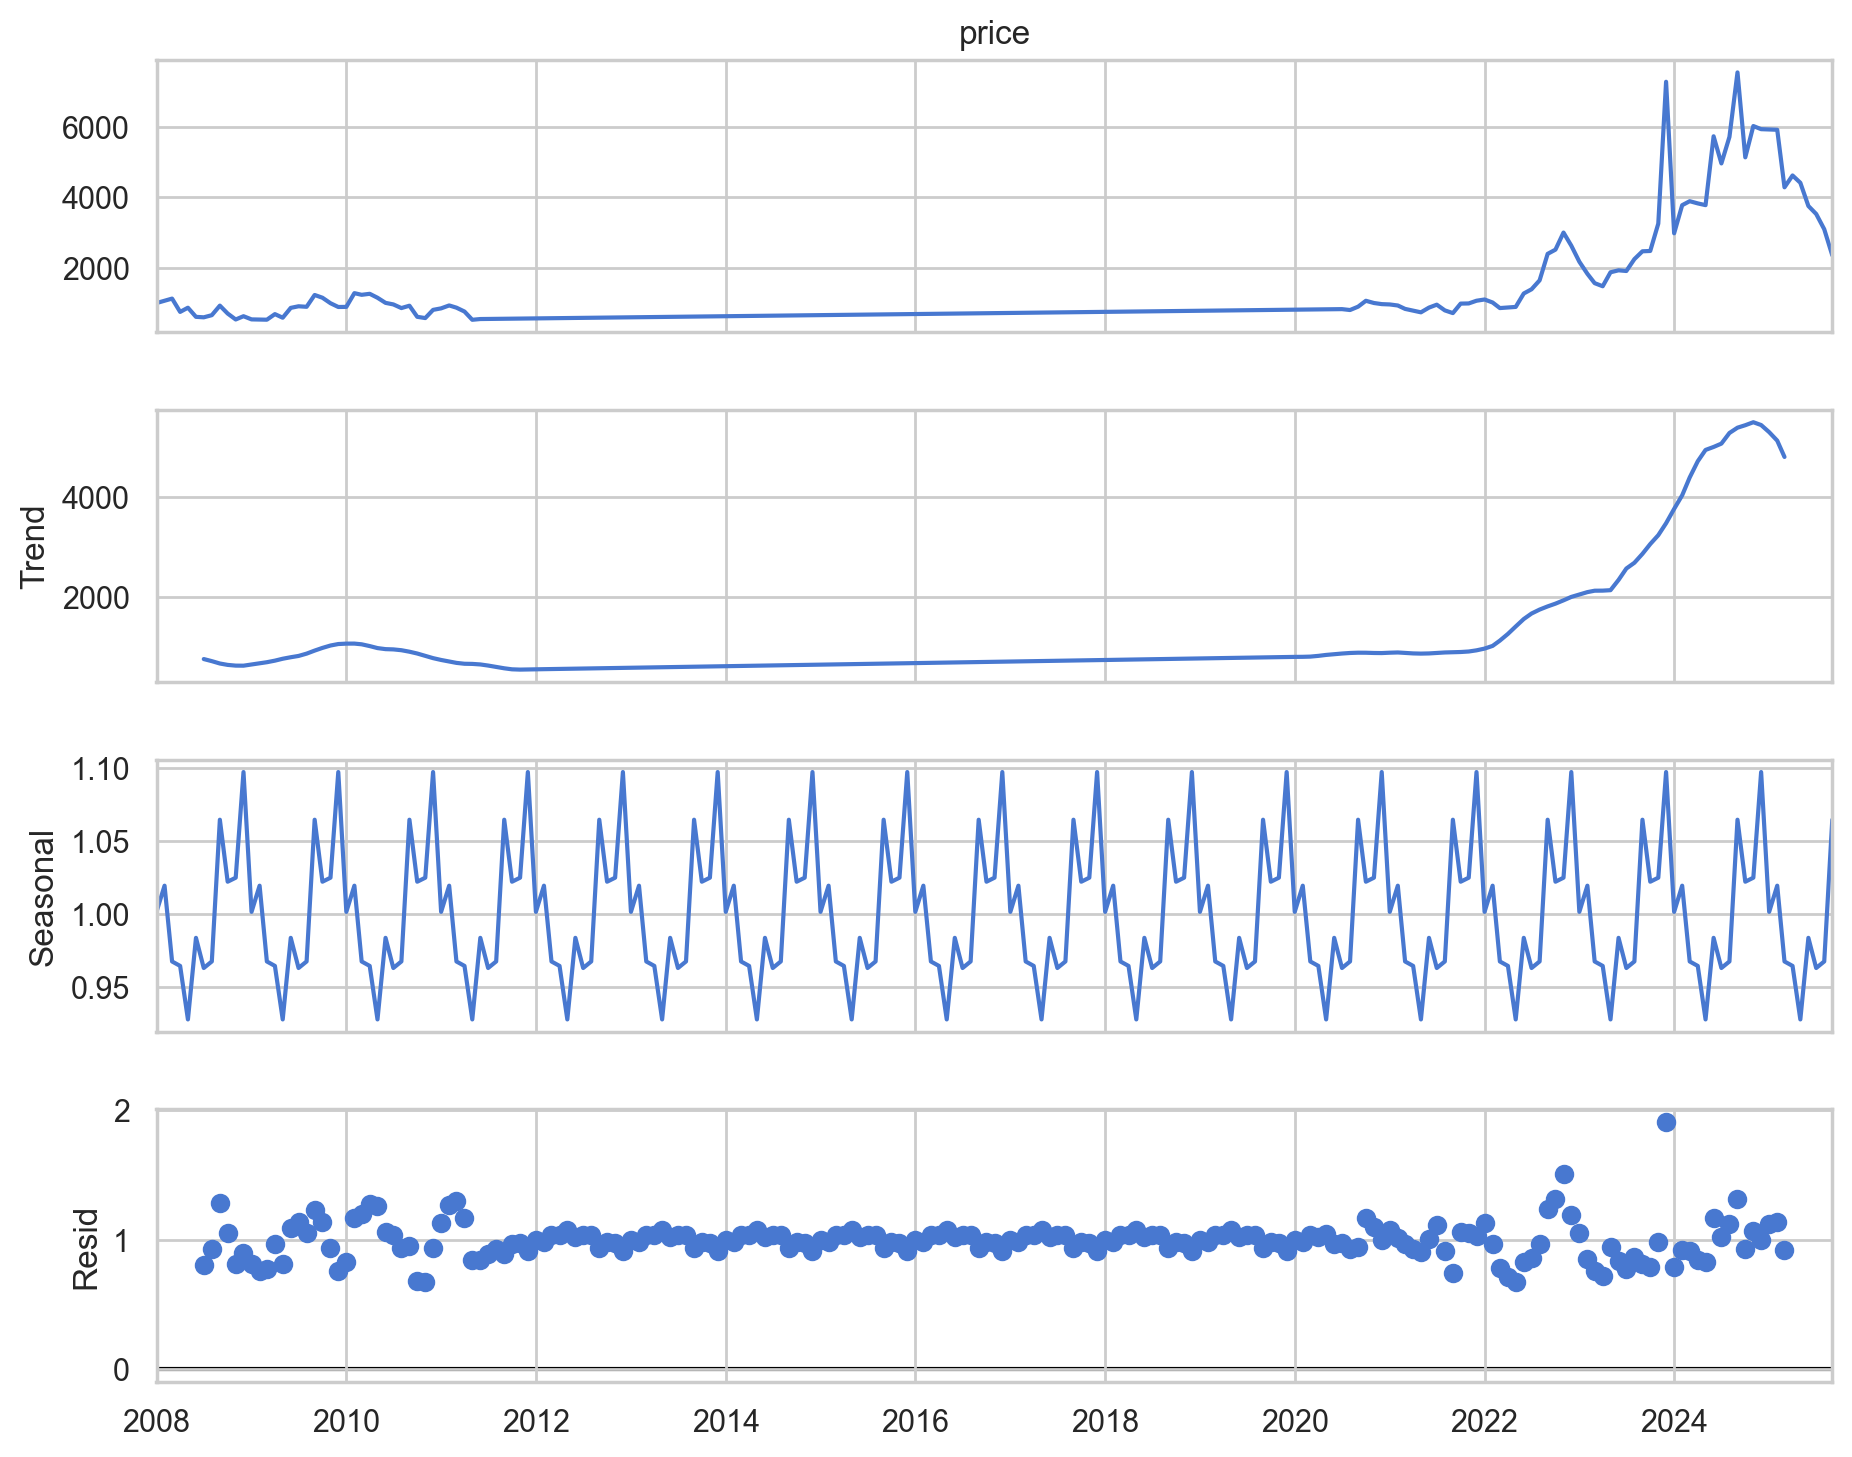

In [8]:

paths = seasonality_plot(df, "Onions")
if paths:
    for p in paths:
        display(Image(filename=p))
else:
    print('Not enough data for decomposition')


## Regional Prices

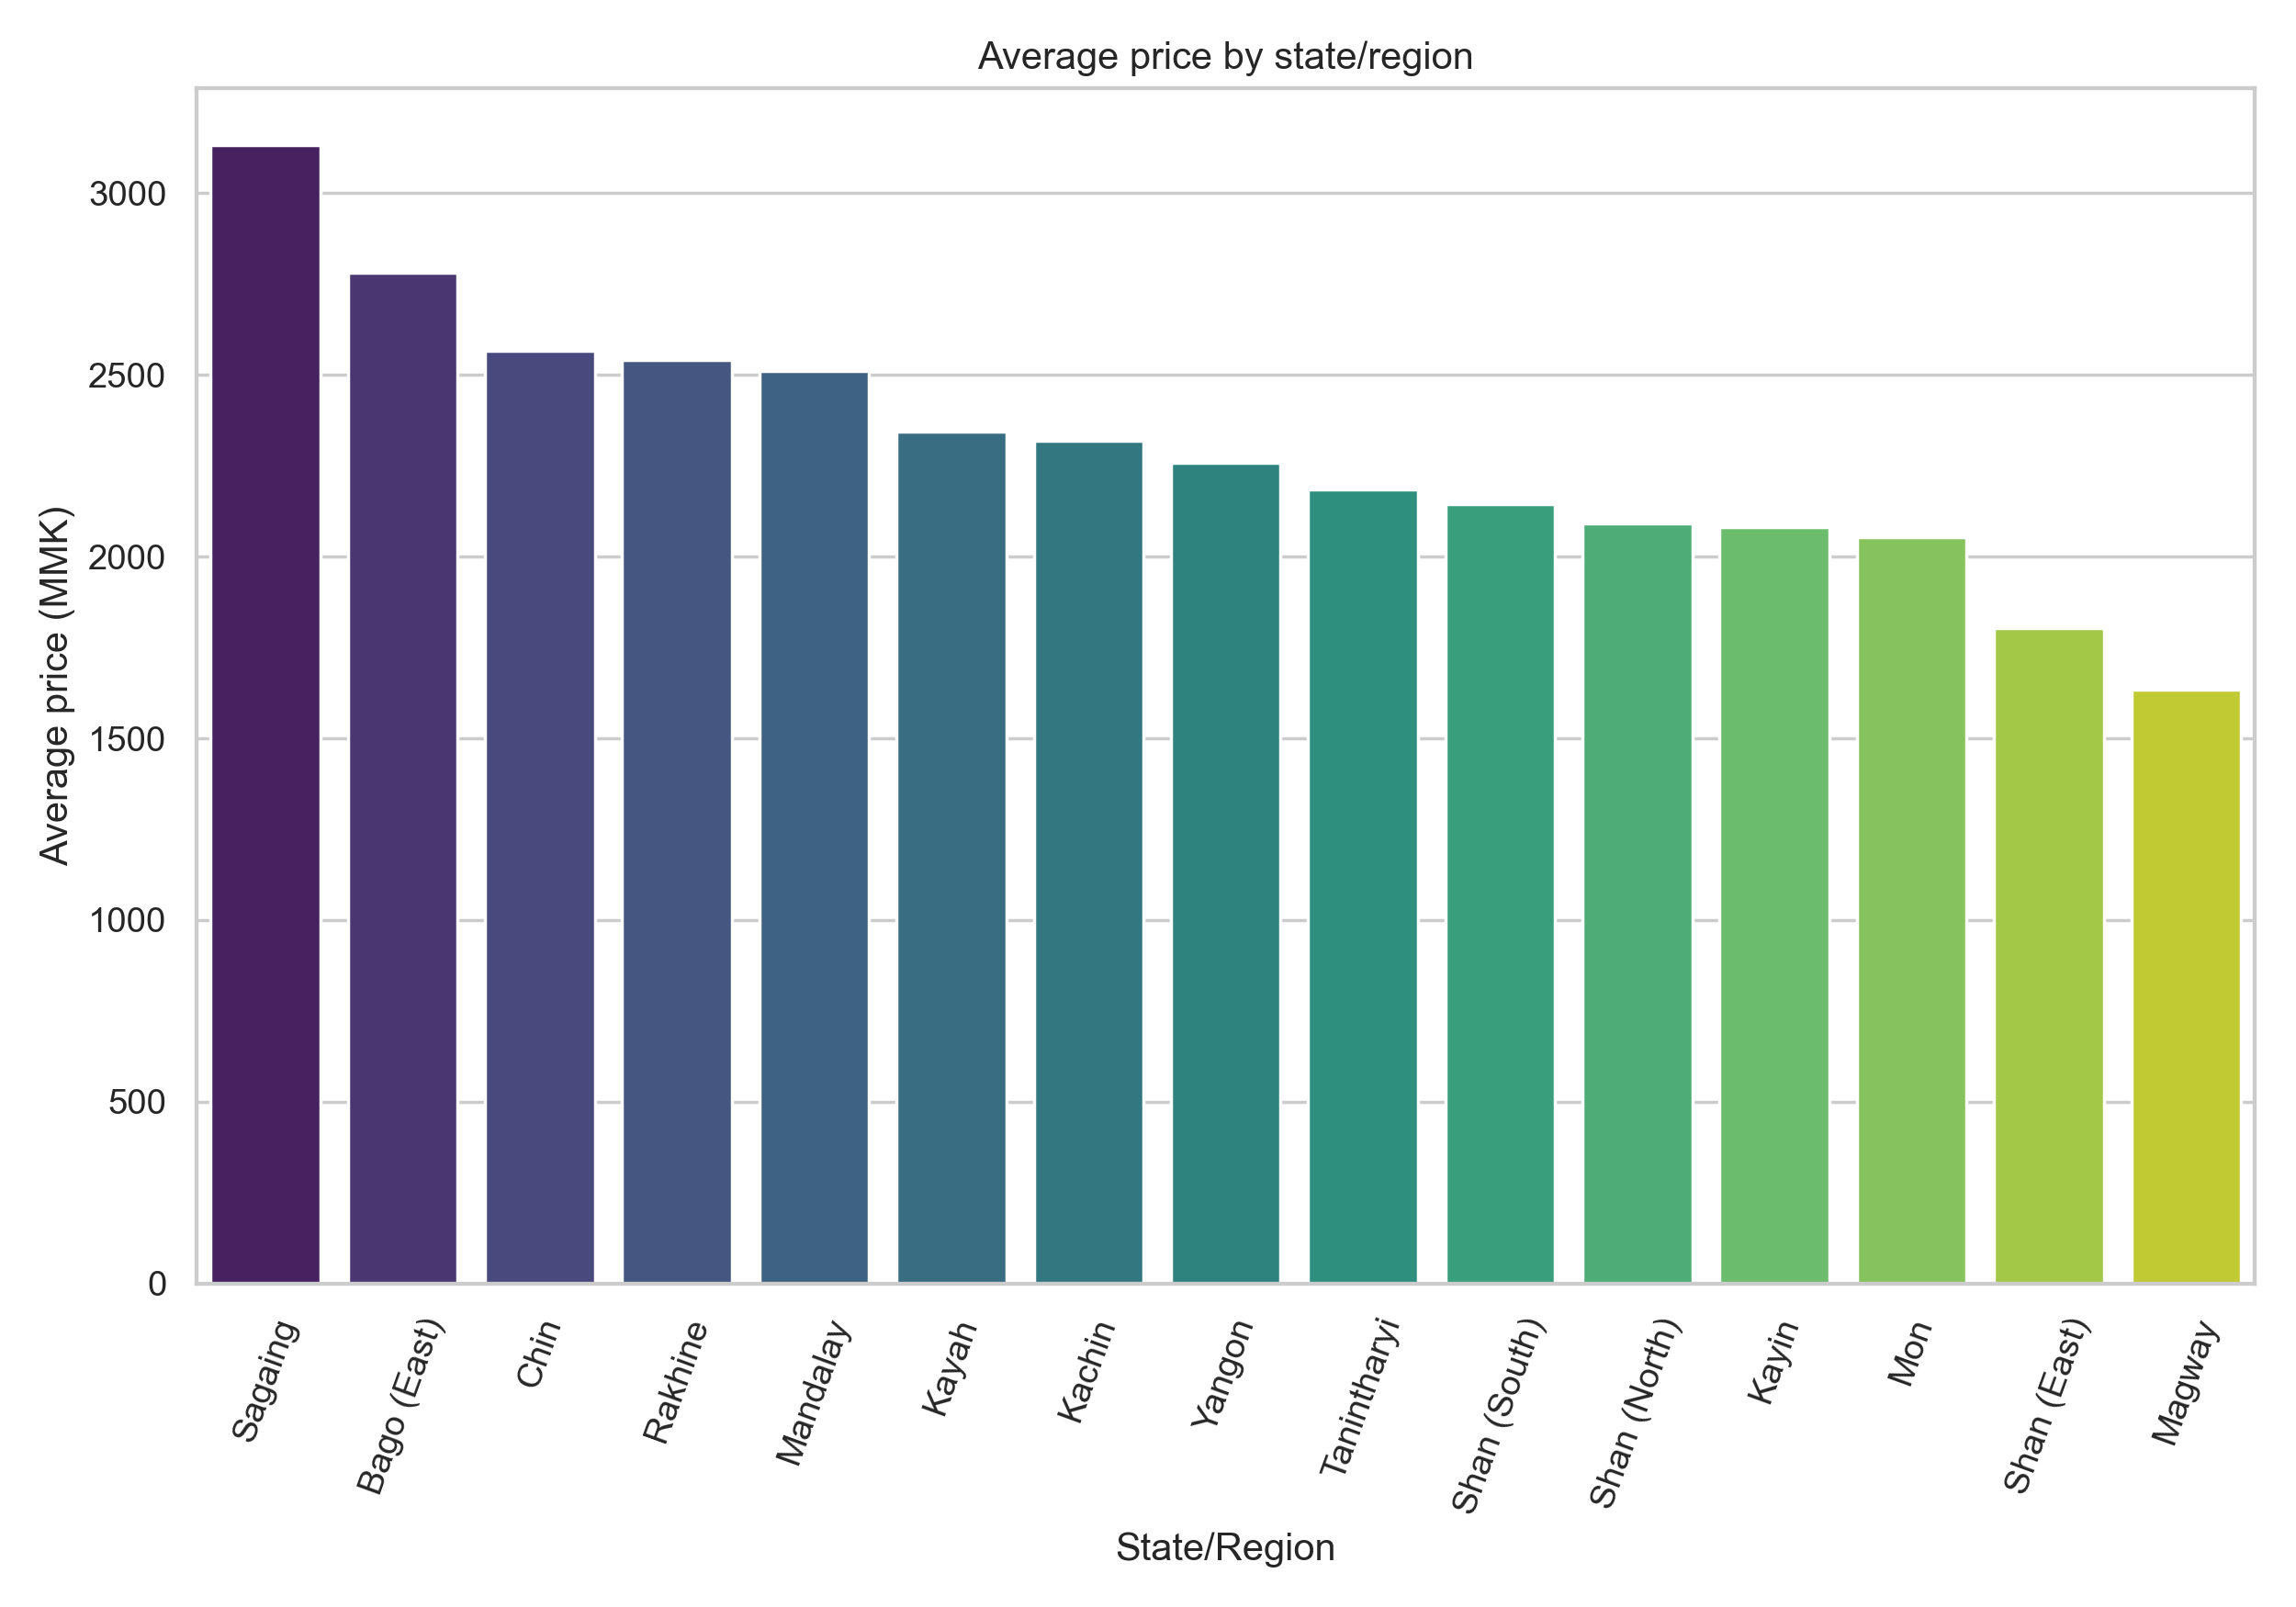

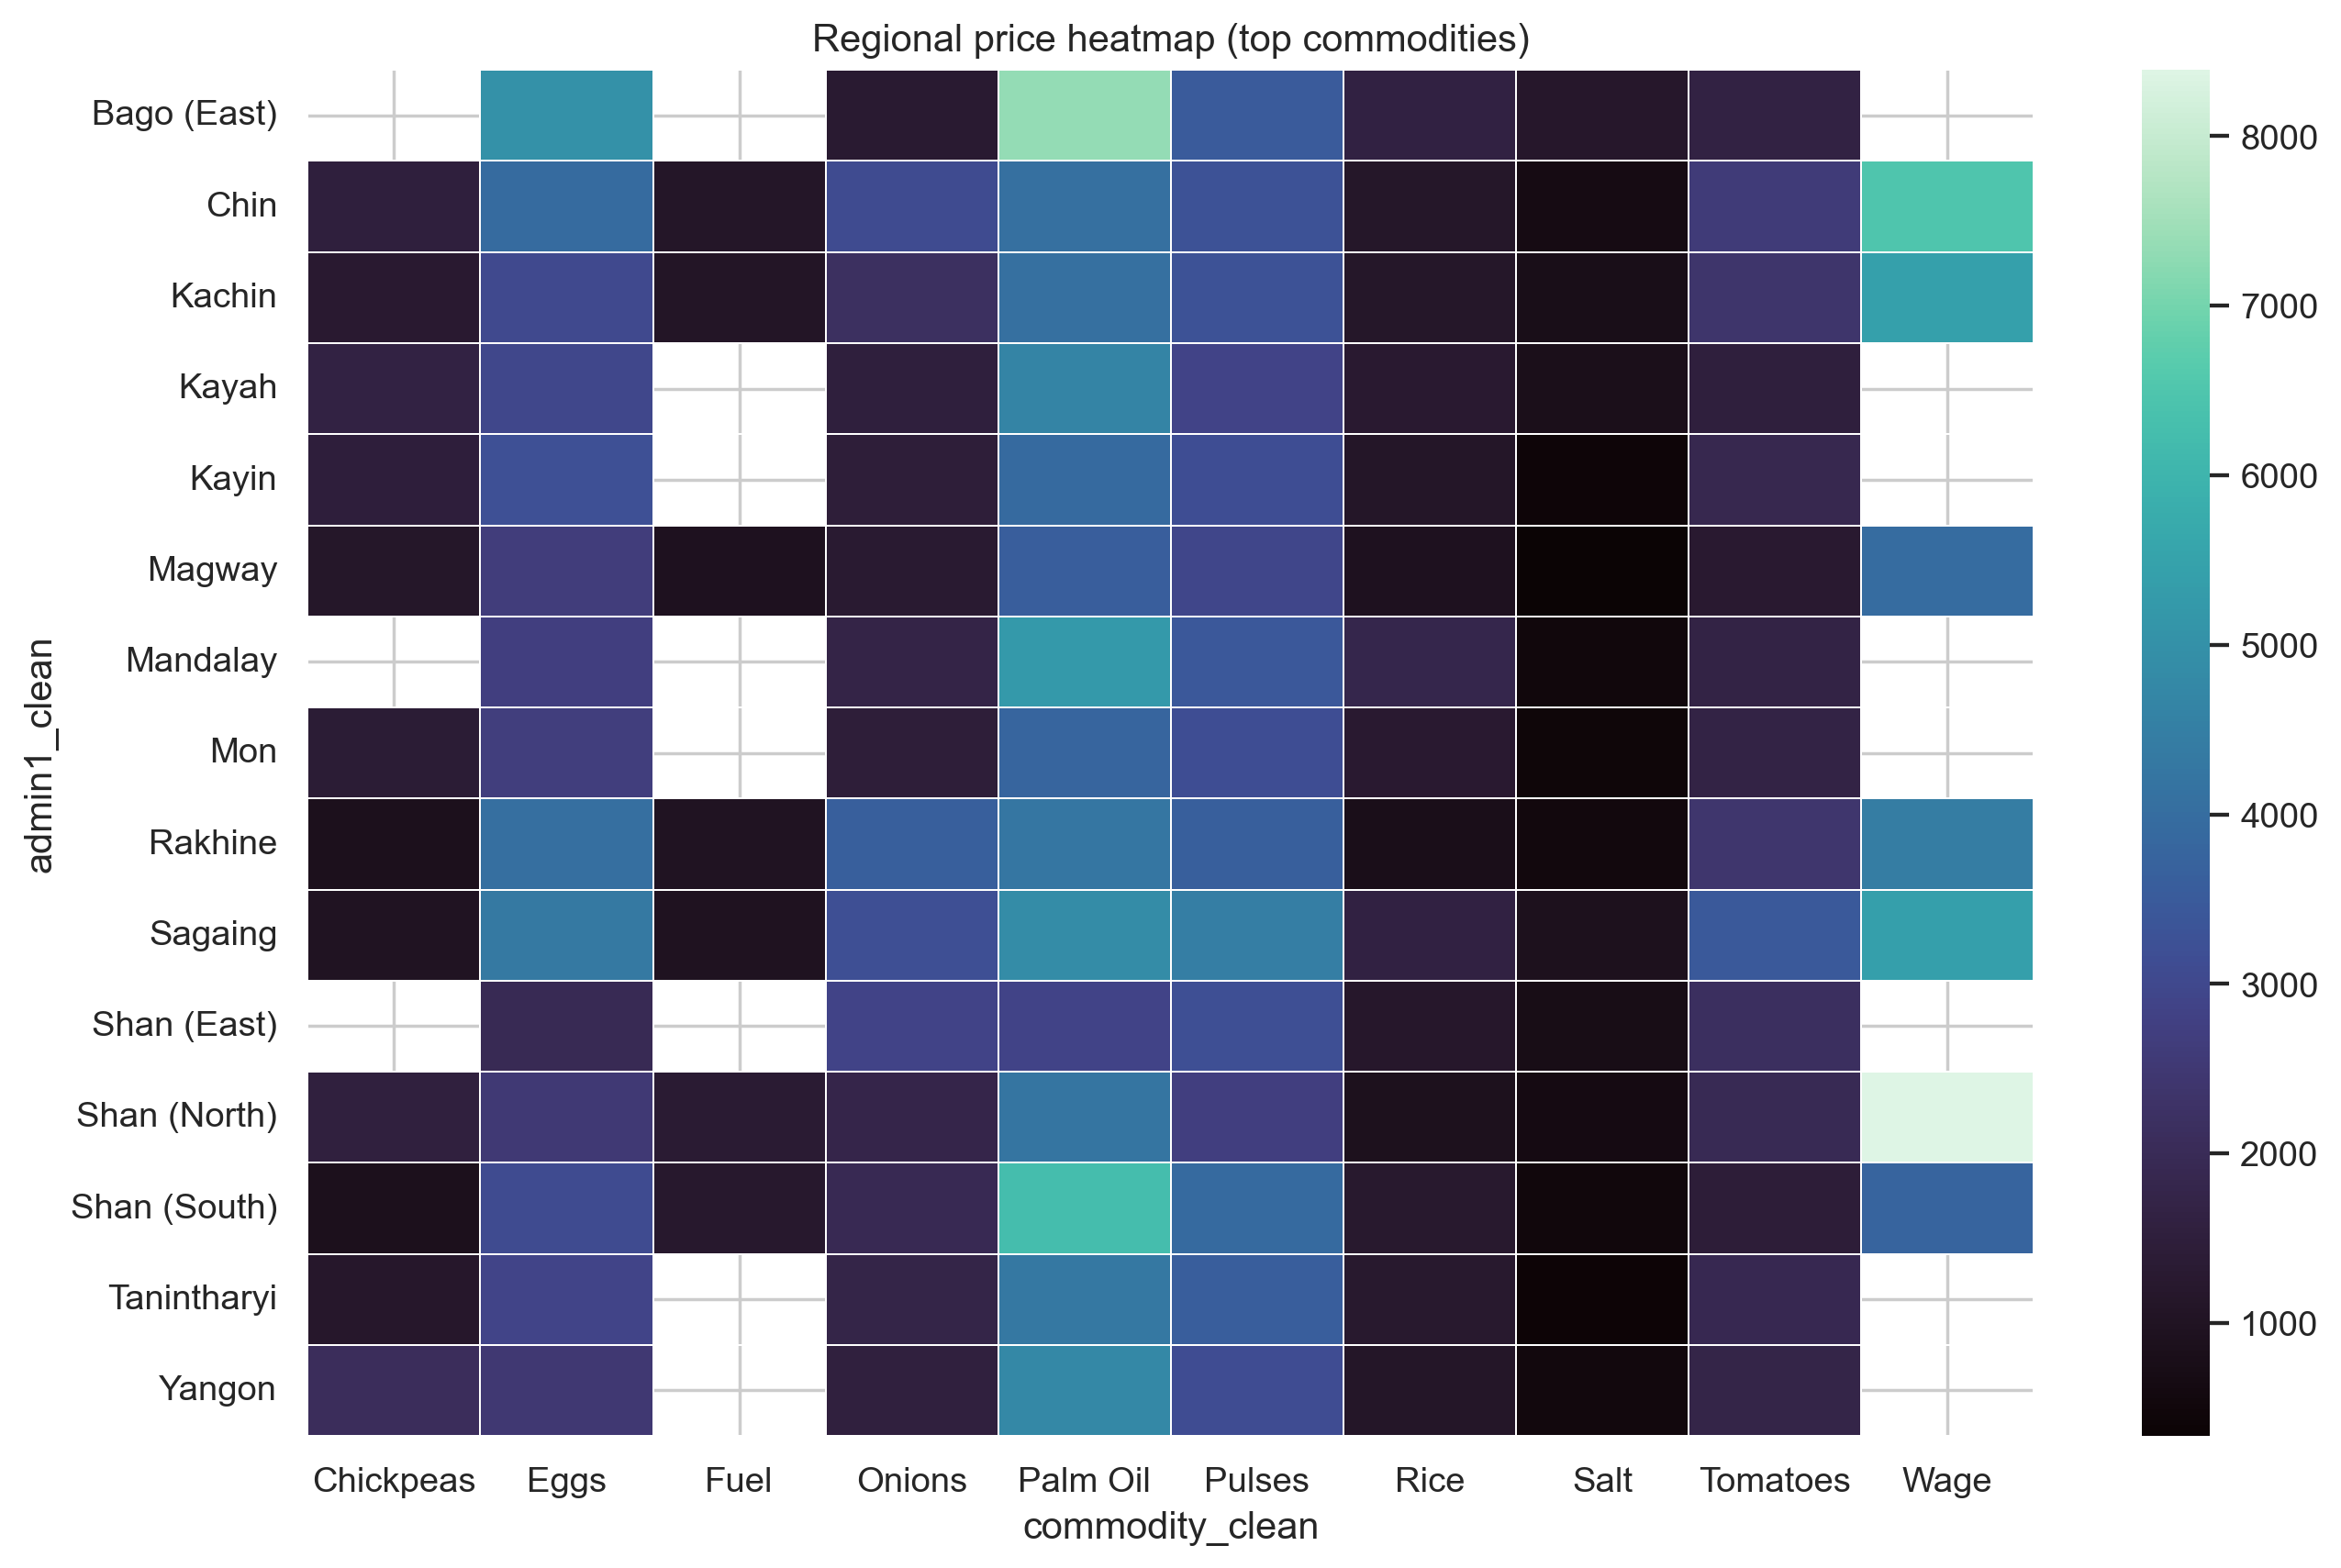

Interactive map saved to: maps\market_price_map.html


In [9]:

regional_outputs = regional_analysis(df)
for p in regional_outputs.get('plots', []):
    display(Image(filename=p))
if regional_outputs.get('maps'):
    print('Interactive map saved to:', regional_outputs['maps'][0])


## Volatility

,mean,std,cv,monthly_change_std
commodity_clean,,,,
Onions,2426.457844,3156.599415,1.300908,0.236874
Salt,597.240854,596.454225,0.998683,0.264907
Tomatoes,2140.993287,1953.351660,0.912358,0.366170
Palm Oil,4269.349723,3482.995718,0.815814,0.103045
Pulses,3329.978242,2640.291754,0.792886,0.110757
Rice,1028.218906,811.500062,0.789229,0.082993
Eggs,3308.743443,2516.278479,0.760494,0.094618
Wage,6387.511489,3739.580450,0.585452,0.180779
Garlic,1539.070763,879.421319,0.571398,0.386252


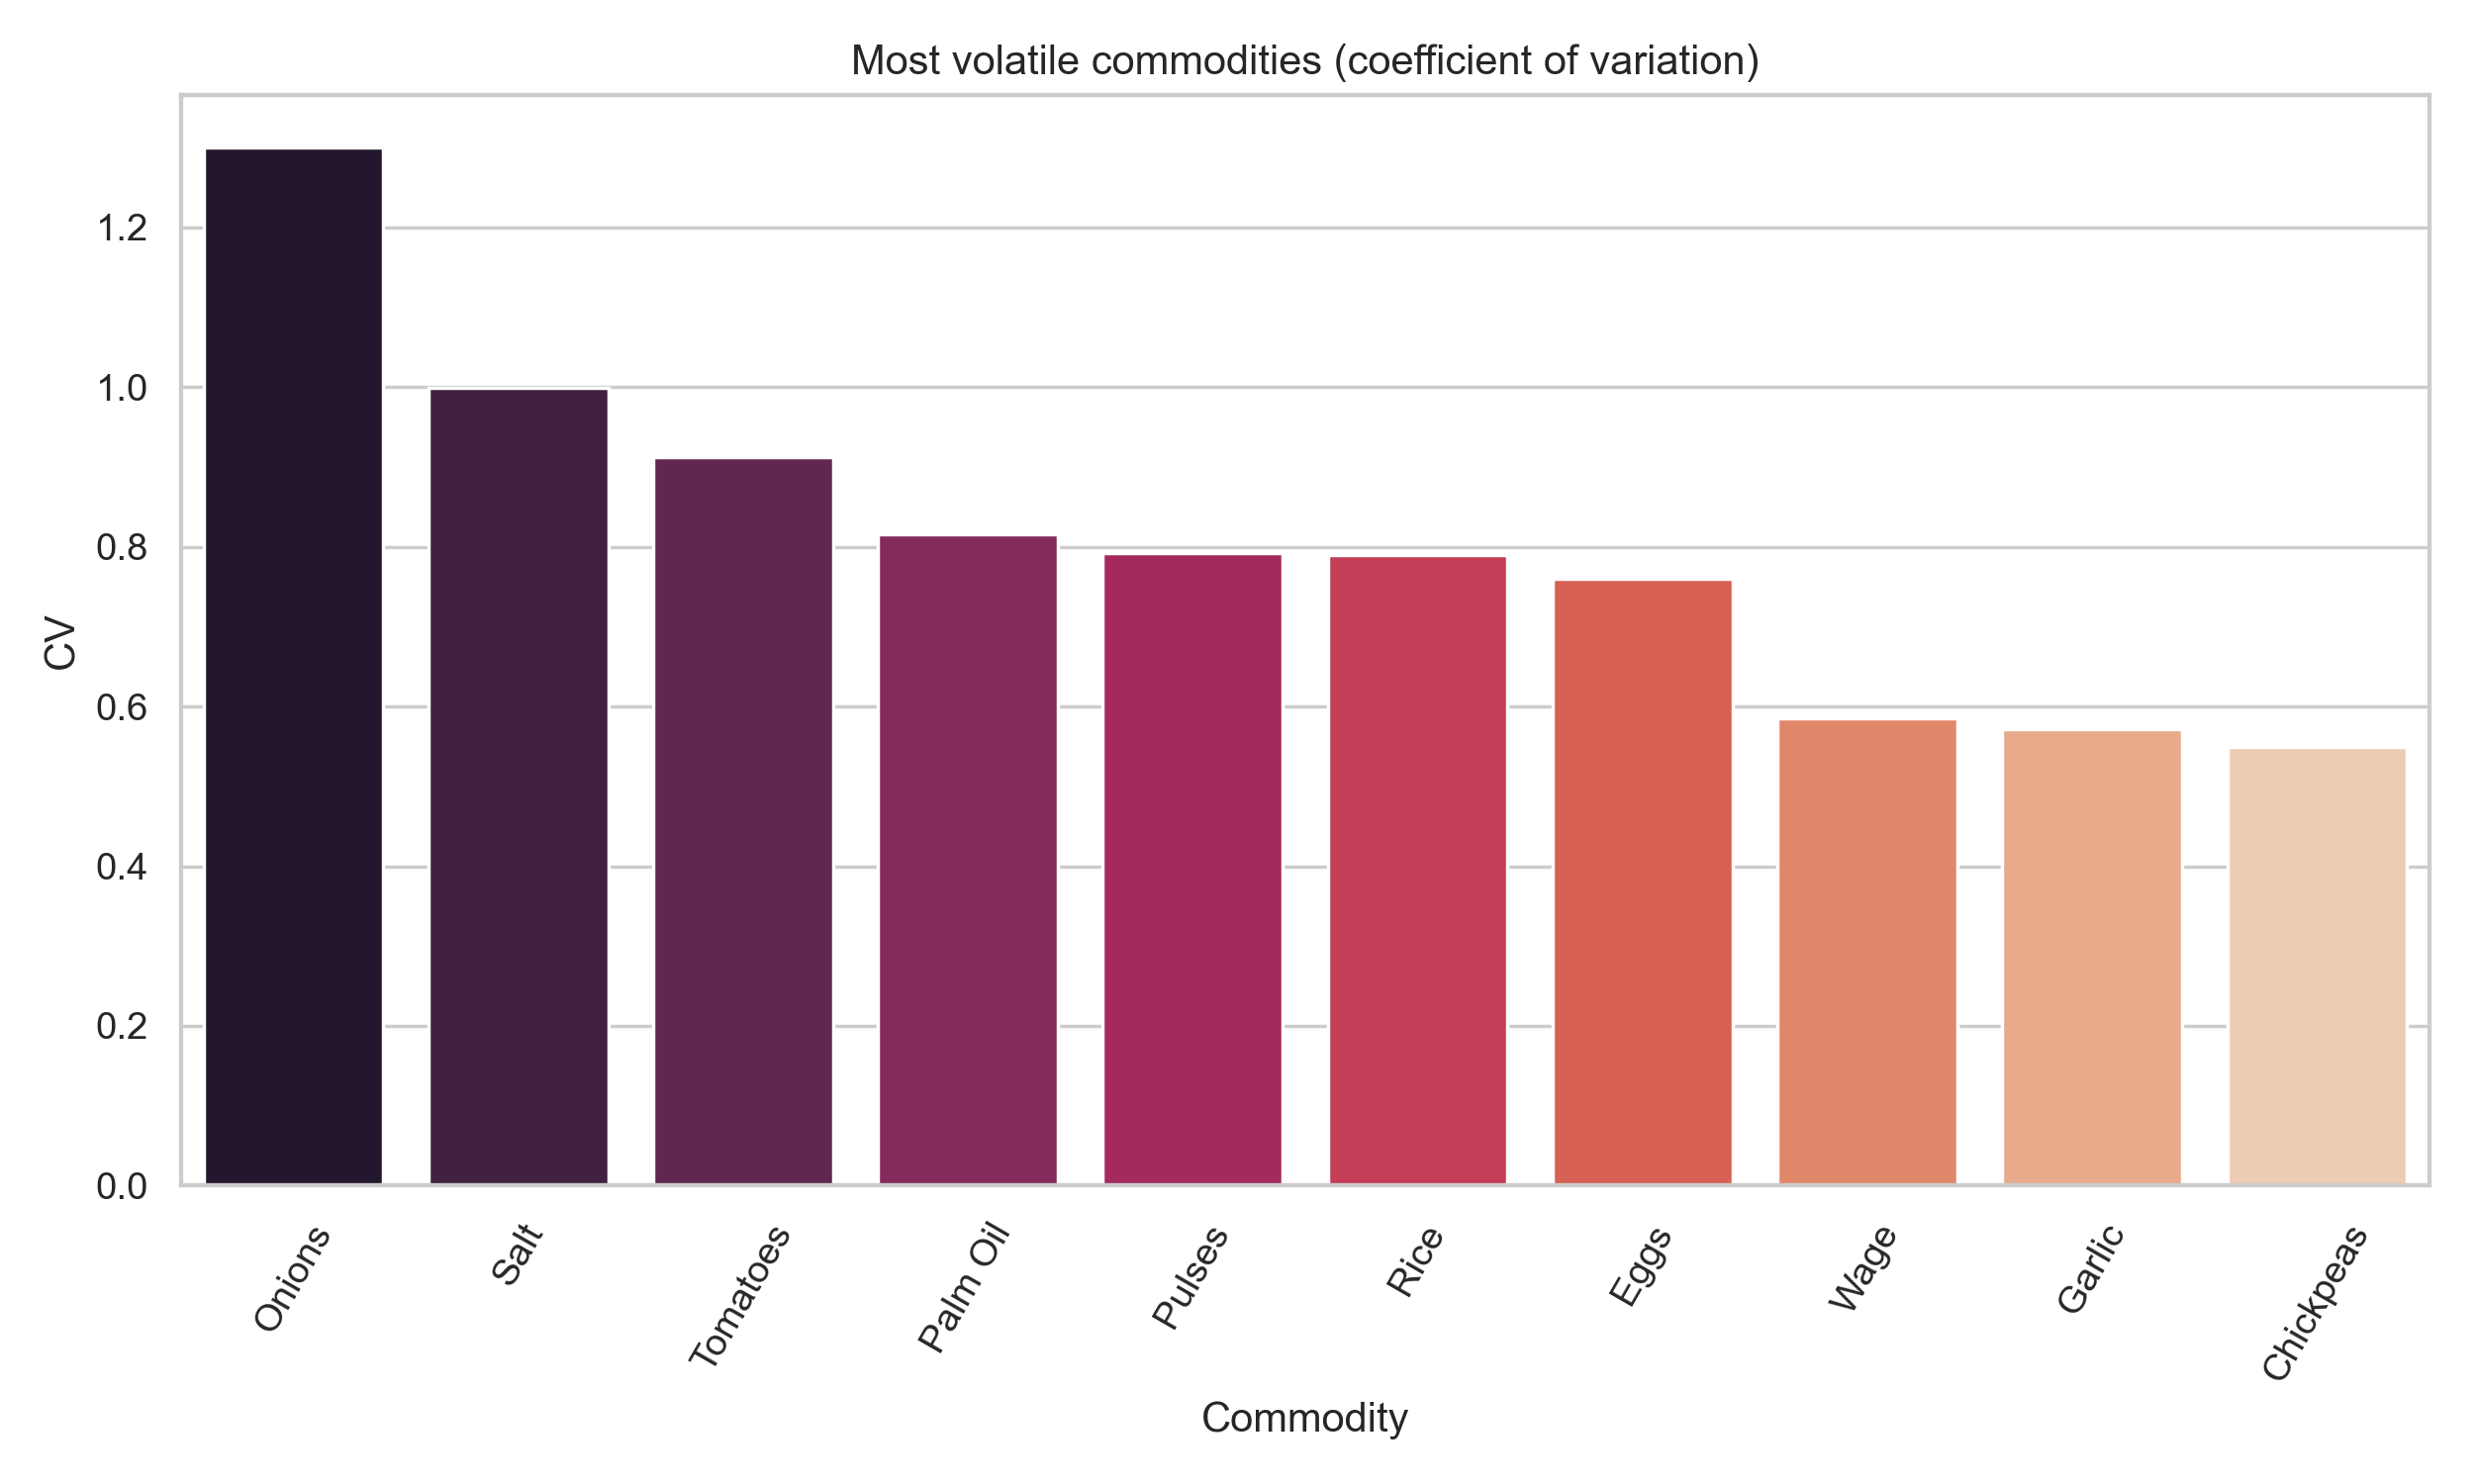

In [10]:

vol_df, paths = volatility_analysis(df)
display(vol_df.sort_values('cv', ascending=False).head(10))
for p in paths:
    display(Image(filename=p))


## Price Shocks

Outliers detected: 386


,date,admin1,admin2,market,market_id,latitude,longitude,category,commodity,commodity_id,...,usdprice,commodity_clean,category_clean,unit_clean,market_clean,admin1_clean,admin2_clean,month,year,zscore
82,2008-02-15,Rakhine,Maungdaw,Taung Bazzar,1017,21.01,92.51,cereals and tubers,Rice (low quality),145,...,0.67,Rice,Cereals And Tubers,kg,Taung Bazzar,Rakhine,Maungdaw,2008-02-01,2008,3.812698
427,2008-08-15,Shan (North),Kyaukme,Man Pan,998,22.29,97.78,cereals and tubers,Rice (high quality),247,...,1.03,Rice,Cereals And Tubers,kg,Man Pan,Shan (North),Kyaukme,2008-08-01,2008,5.003651
428,2008-08-15,Shan (North),Kyaukme,Man Pan,998,22.29,97.78,cereals and tubers,Rice (low quality),145,...,0.82,Rice,Cereals And Tubers,kg,Man Pan,Shan (North),Kyaukme,2008-08-01,2008,3.041241
534,2008-10-15,Rakhine,Mrauk-U,Kha Mauck Siek,990,20.67,93.26,oil and fats,Oil (palm),62,...,2.57,Palm Oil,Oil And Fats,liter,Kha Mauck Siek,Rakhine,Mrauk-U,2008-10-01,2008,3.250361
2018,2010-06-15,Magway,Magway,Yenanchaung,1023,20.46,94.87,cereals and tubers,Potatoes,83,...,1.25,Potatoes,Cereals And Tubers,kg,Yenanchaung,Magway,Magway,2010-06-01,2010,3.012475


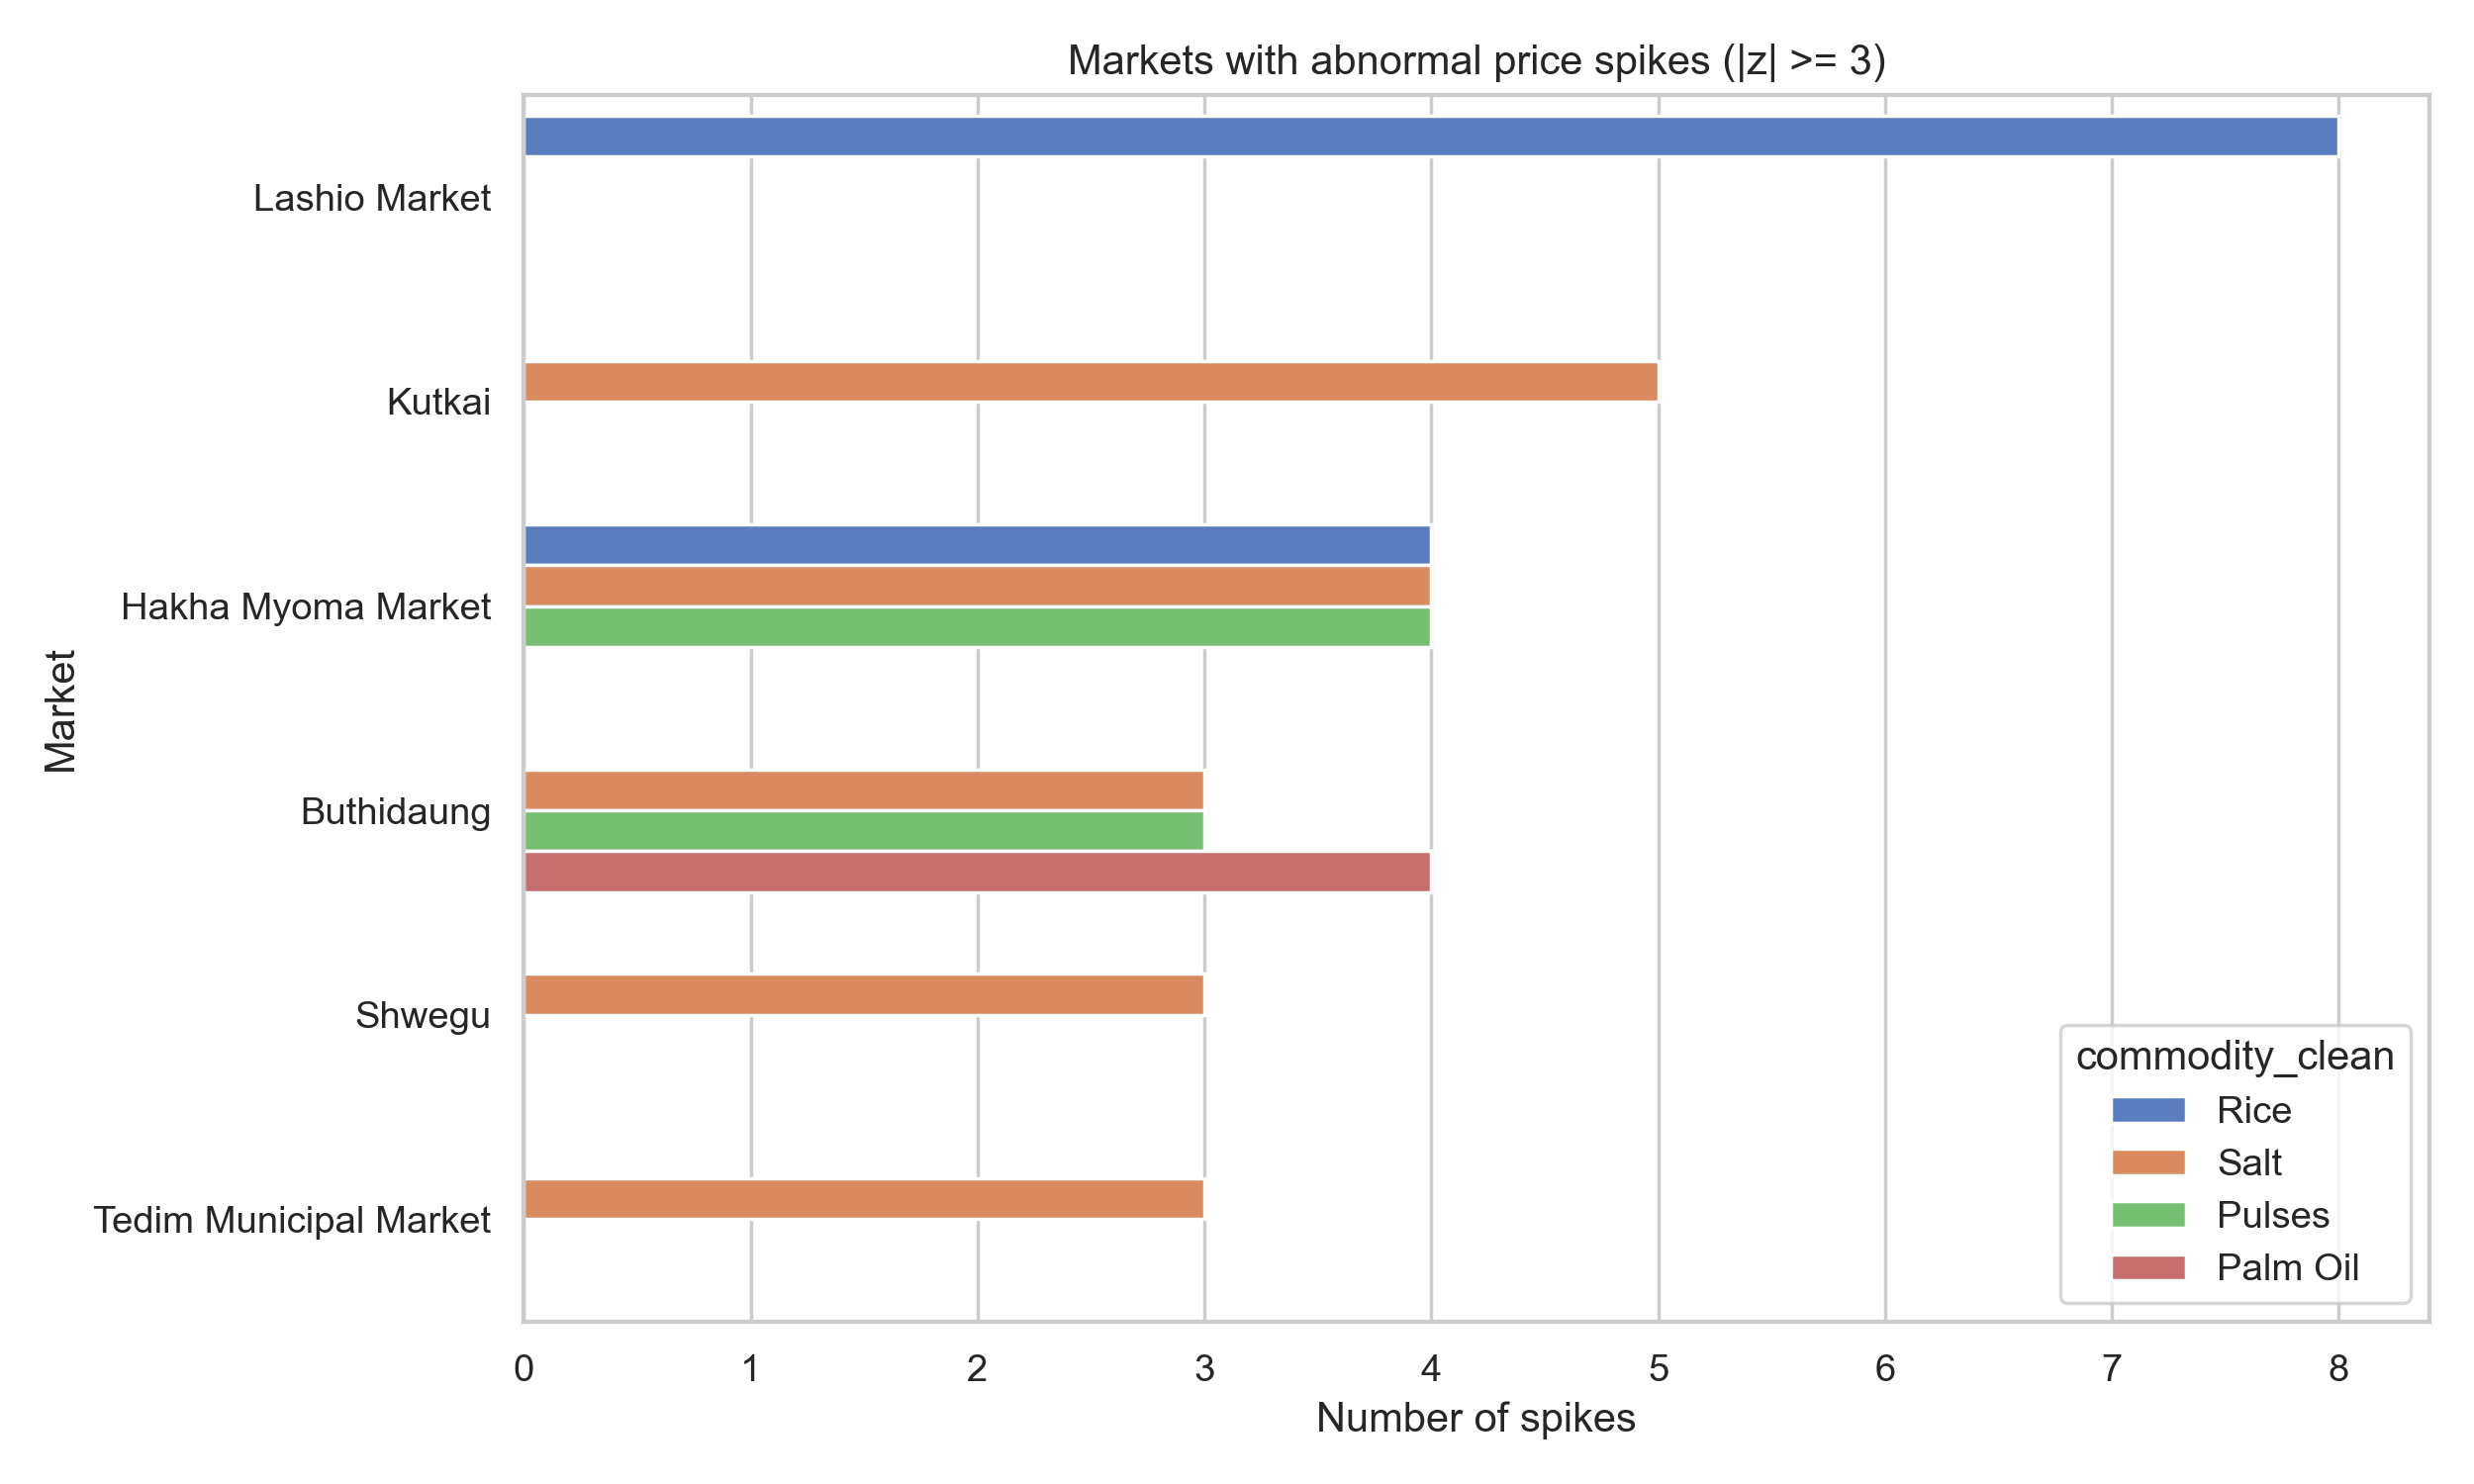

In [11]:

shocks_df, paths = price_shocks(df)
print('Outliers detected:', len(shocks_df))
display(shocks_df.head())
for p in paths:
    display(Image(filename=p))


## Currency Divergence

MMK vs USD correlation: 0.879


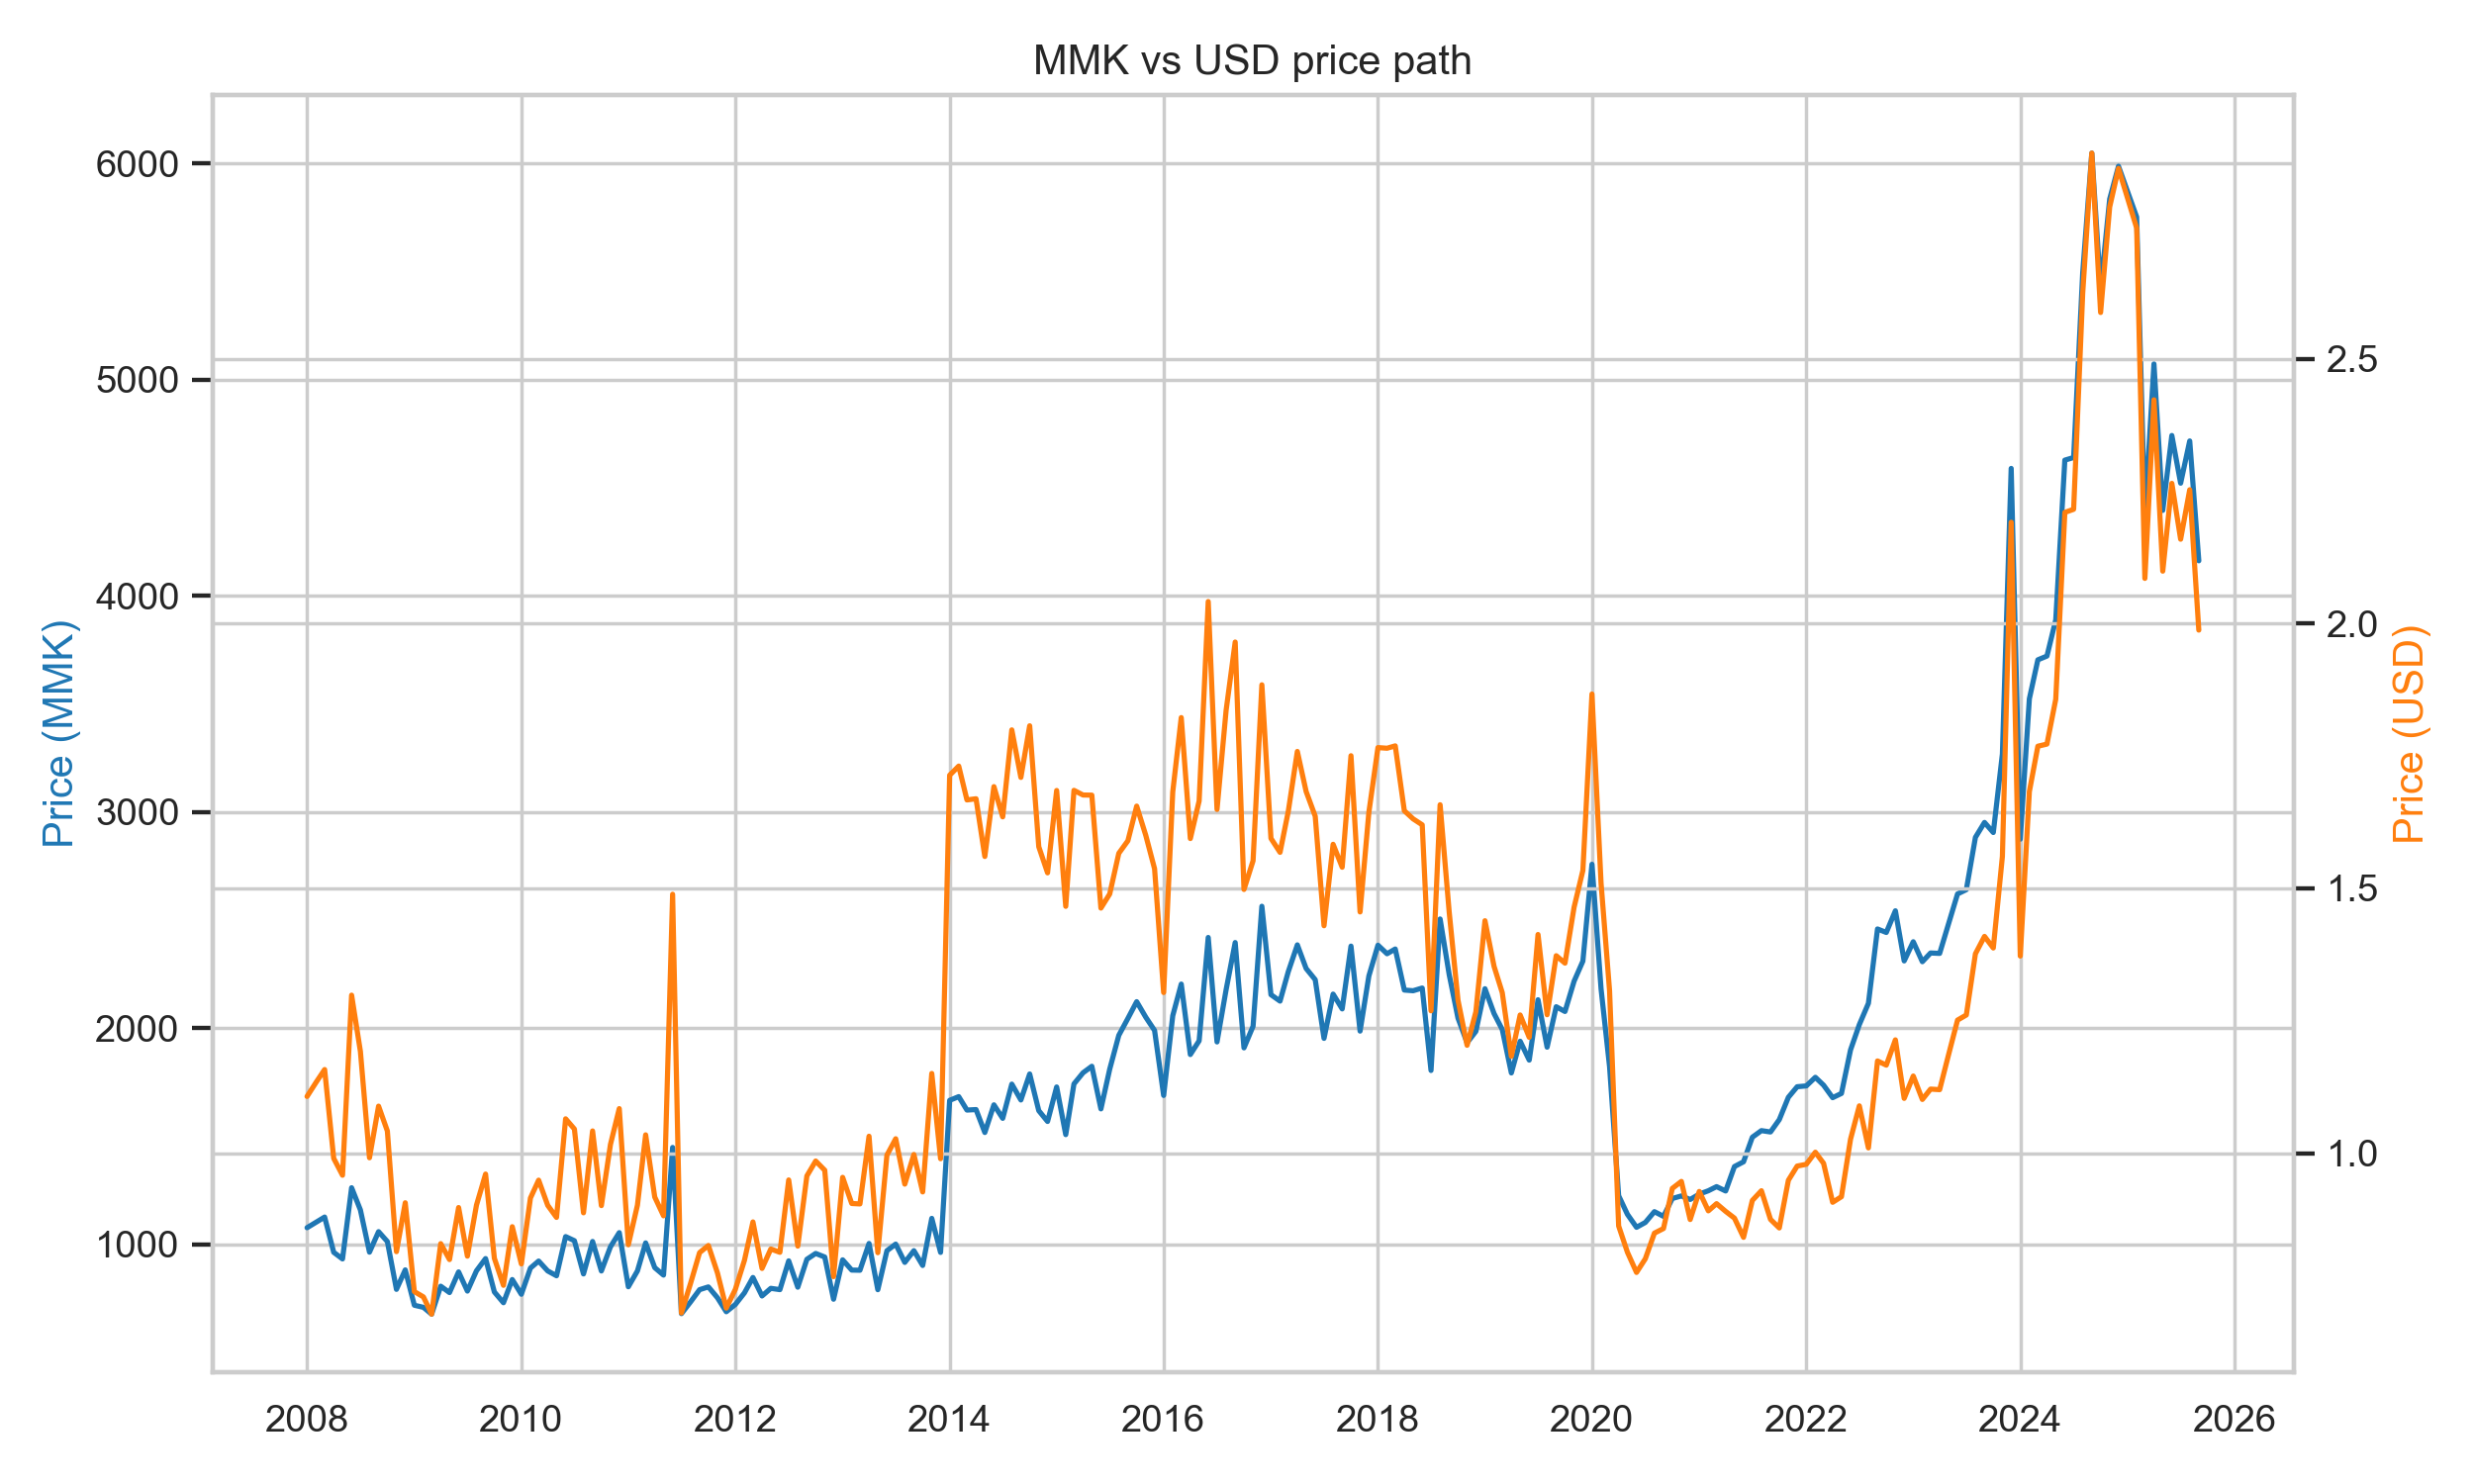

In [12]:

corr_val, paths = currency_divergence(df)
print('MMK vs USD correlation:', round(corr_val, 3))
for p in paths:
    display(Image(filename=p))


## Commodity Correlations

commodity_clean,Beans,Chickpeas,Eggs,Fuel,Garlic,Groundnut Oil,Imported Mixed Oil,Maize,Meat,Onions,Palm Oil,Potatoes,Pulses,Rice,Salt,Tomatoes,Wage
commodity_clean,,,,,,,,,,,,,,,,,
Beans,1.000000,0.489077,NaN,NaN,0.399700,0.328807,0.151504,-0.331484,0.514792,0.101643,0.186484,0.186783,NaN,0.240371,0.090188,0.146761,NaN
Chickpeas,0.489077,1.000000,-0.257763,-0.221316,0.412664,0.811406,-0.137525,-0.444980,0.217384,0.163032,0.251455,0.207047,0.220826,0.363954,0.241200,0.228899,0.453682
Eggs,NaN,-0.257763,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.880938,0.950859,NaN,0.963408,0.929475,0.939441,0.803907,NaN
Fuel,NaN,-0.221316,NaN,1.000000,NaN,-0.542819,-0.392424,NaN,NaN,-0.481492,-0.530665,NaN,-0.562963,-0.497598,-0.403008,-0.564673,0.105621
Garlic,0.399700,0.412664,NaN,NaN,1.000000,0.091059,-0.156444,-0.274895,0.262534,0.085747,0.099079,0.670292,NaN,0.133782,0.087728,0.166464,NaN


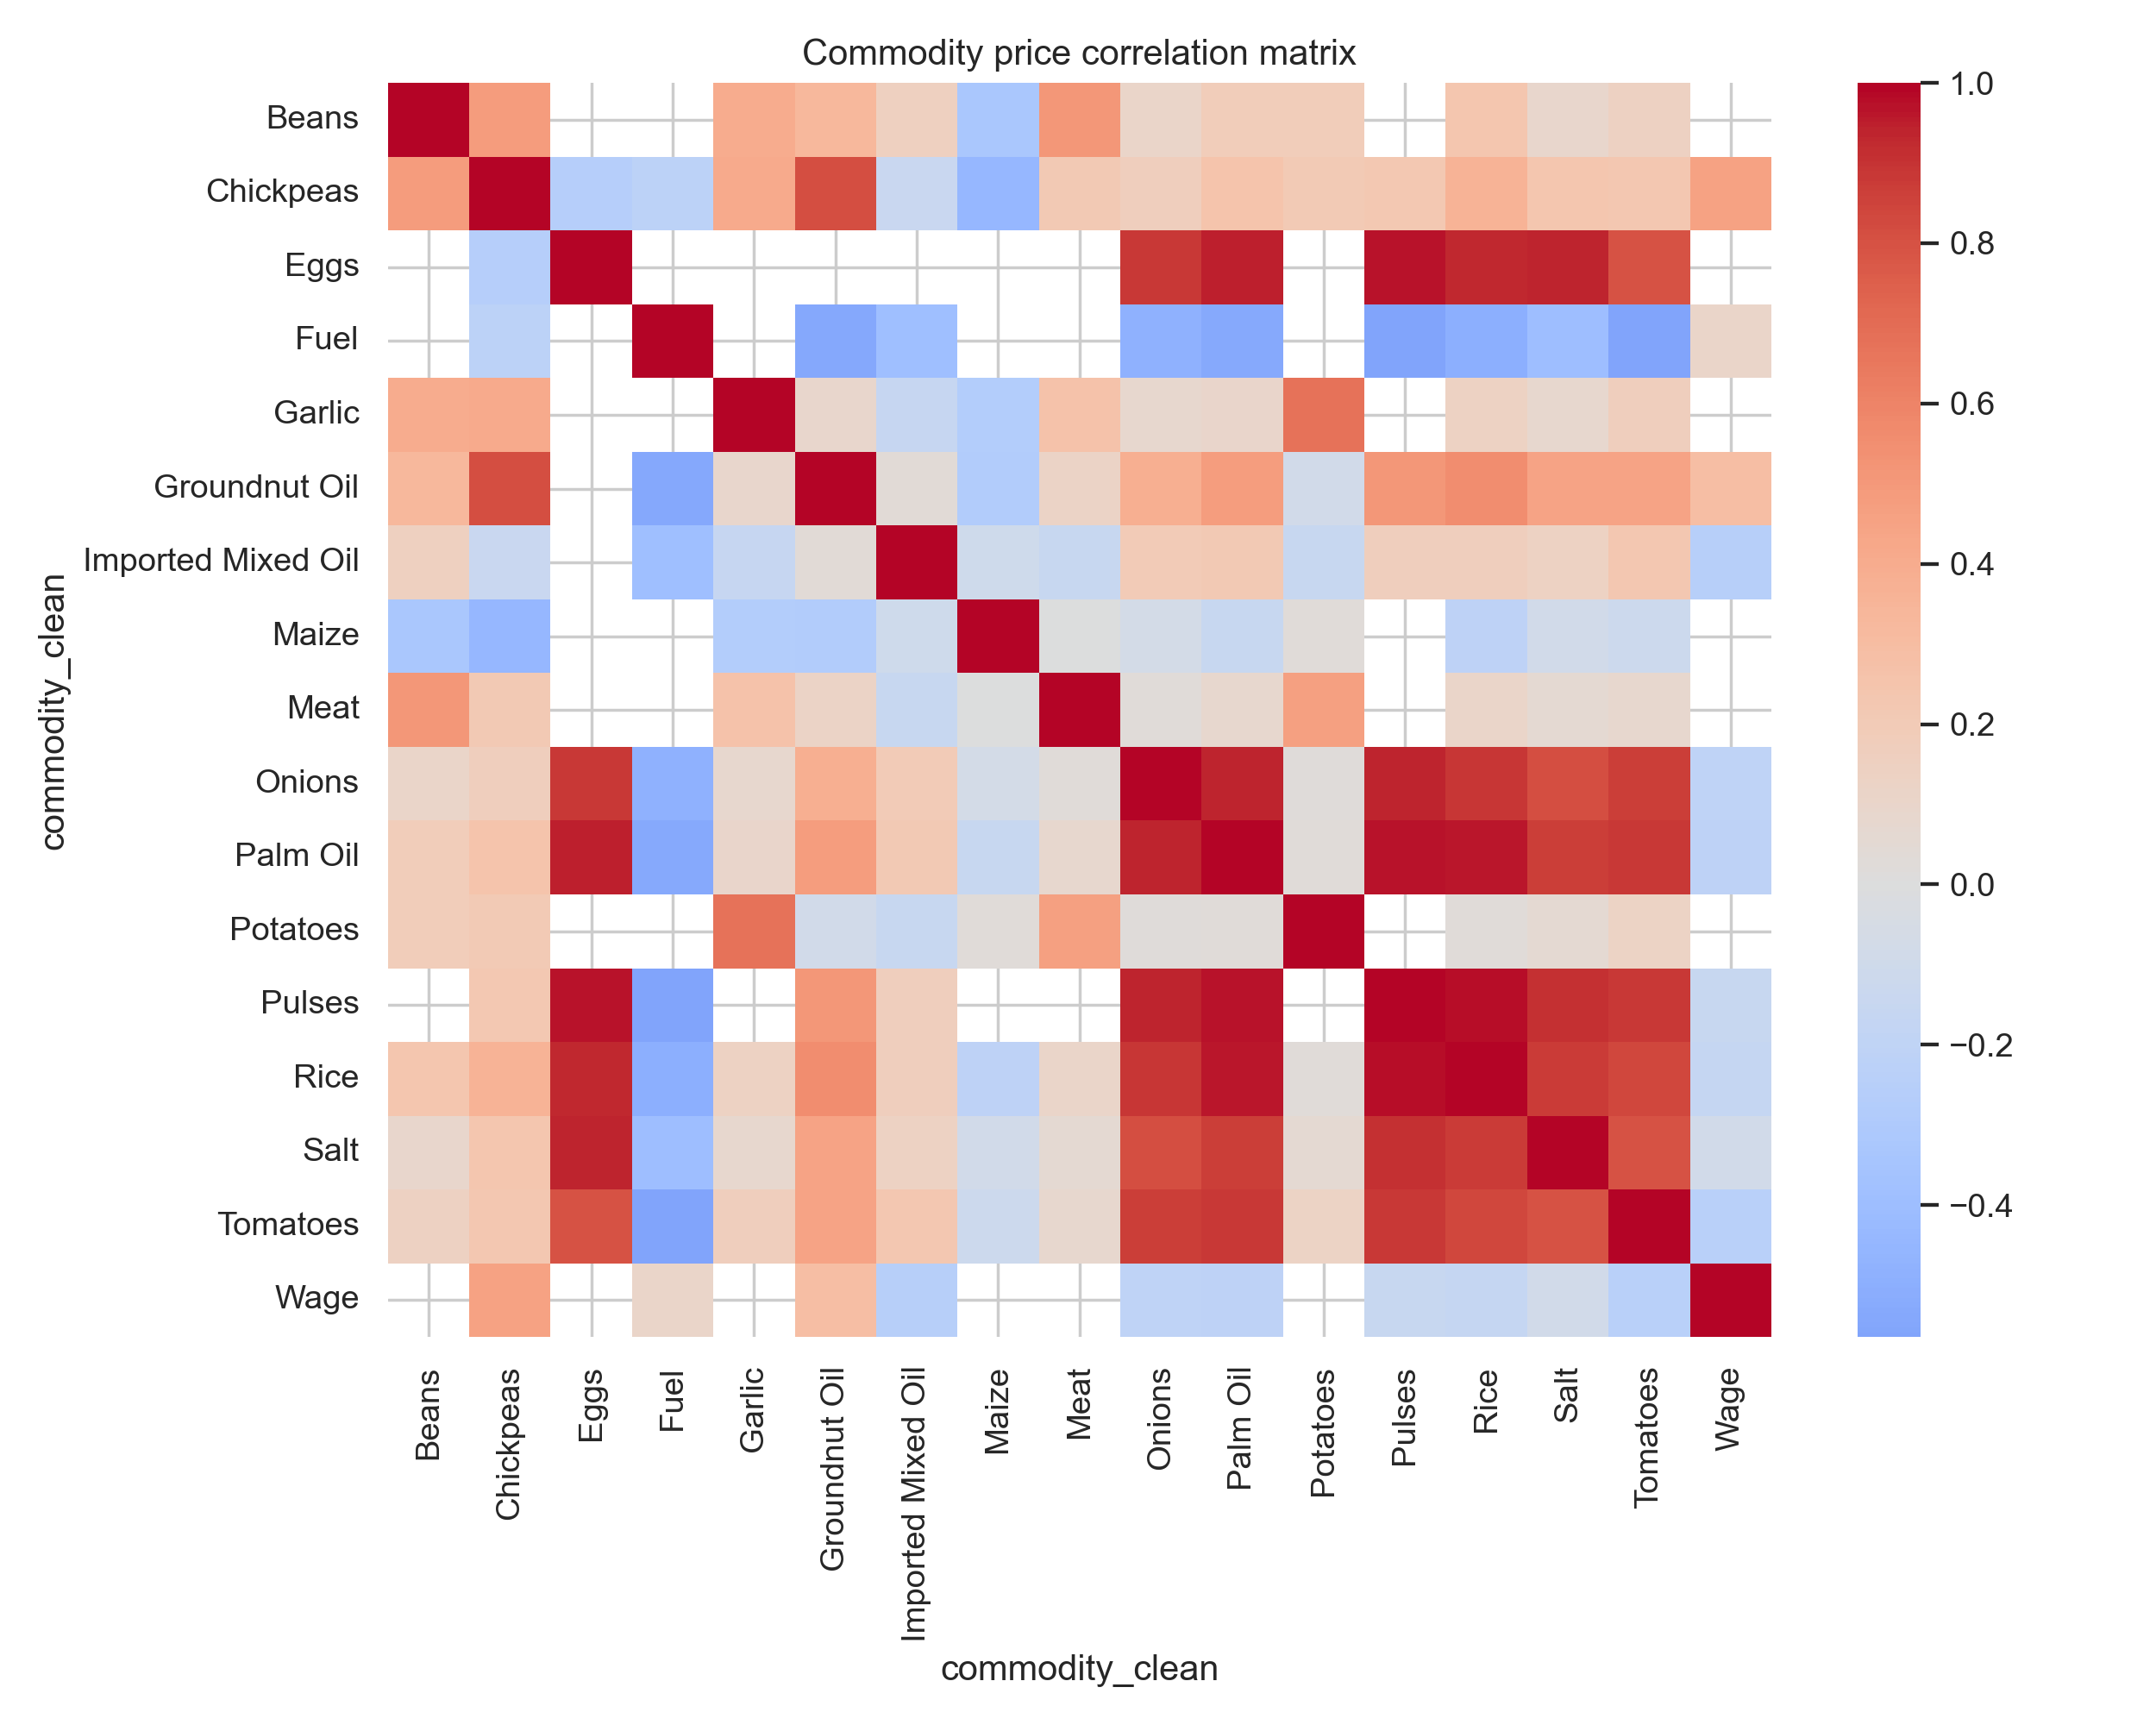

In [13]:

corr_matrix, paths = correlation_analysis(df)
display(corr_matrix.head())
for p in paths:
    display(Image(filename=p))


## Market Clusters

,market,cluster,pc1,pc2
0,Ah Nauk Pyin,1,-7.244139,7.801386
1,Ah Nauk Ywe,1,-6.859773,6.518831
2,Ahpauk Wa,1,-5.811825,4.200179
3,Ai Cheng,4,21.819258,22.220468
4,Alel Than Kyaw,3,1.563241,-12.552730


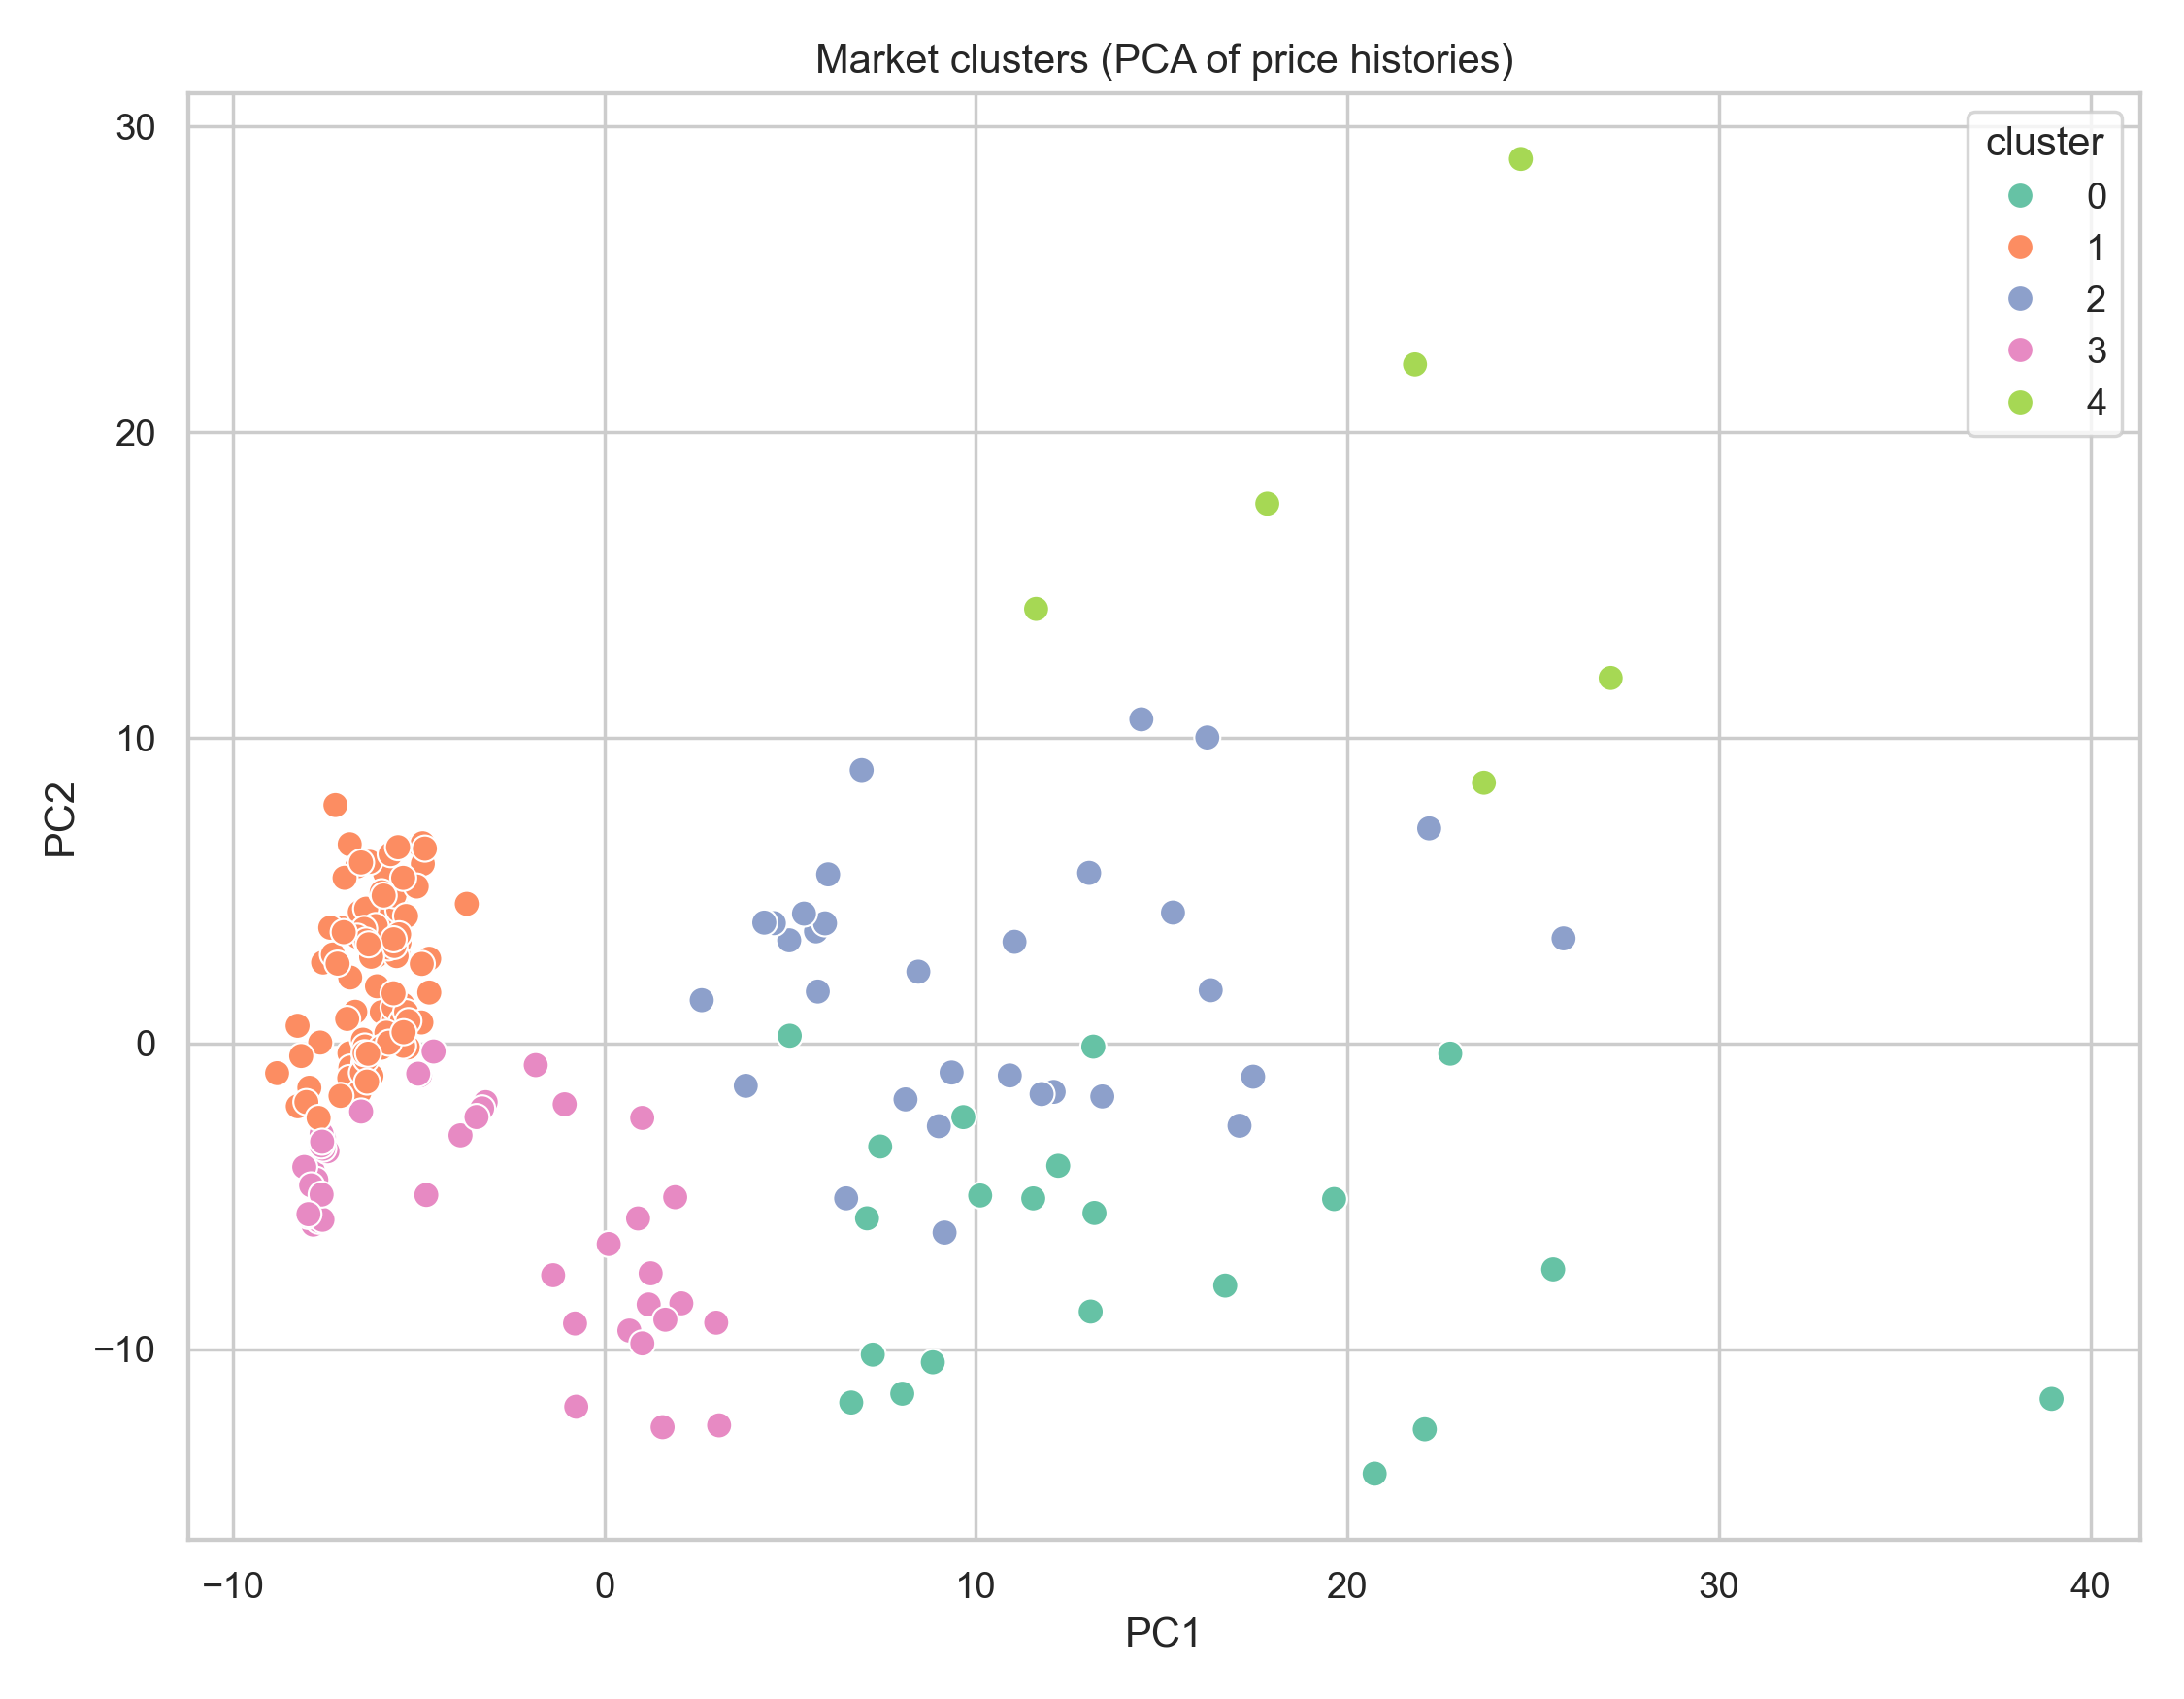

In [14]:

cluster_df, paths = cluster_markets(df)
if not cluster_df.empty:
    display(cluster_df.head())
    for p in paths:
        display(Image(filename=p))
else:
    print('Not enough data to cluster markets')


## Forecast (Rice)

,forecast,lower,upper
2025-10-01,2565.390885,2441.620645,2689.161126
2025-11-01,2567.875873,2403.509906,2732.241840
2025-12-01,2566.236598,2363.633944,2768.839252
2026-01-01,2567.317981,2335.983527,2798.652435
2026-02-01,2566.604624,2307.751969,2825.457278
2026-03-01,2567.075205,2284.558749,2849.591661


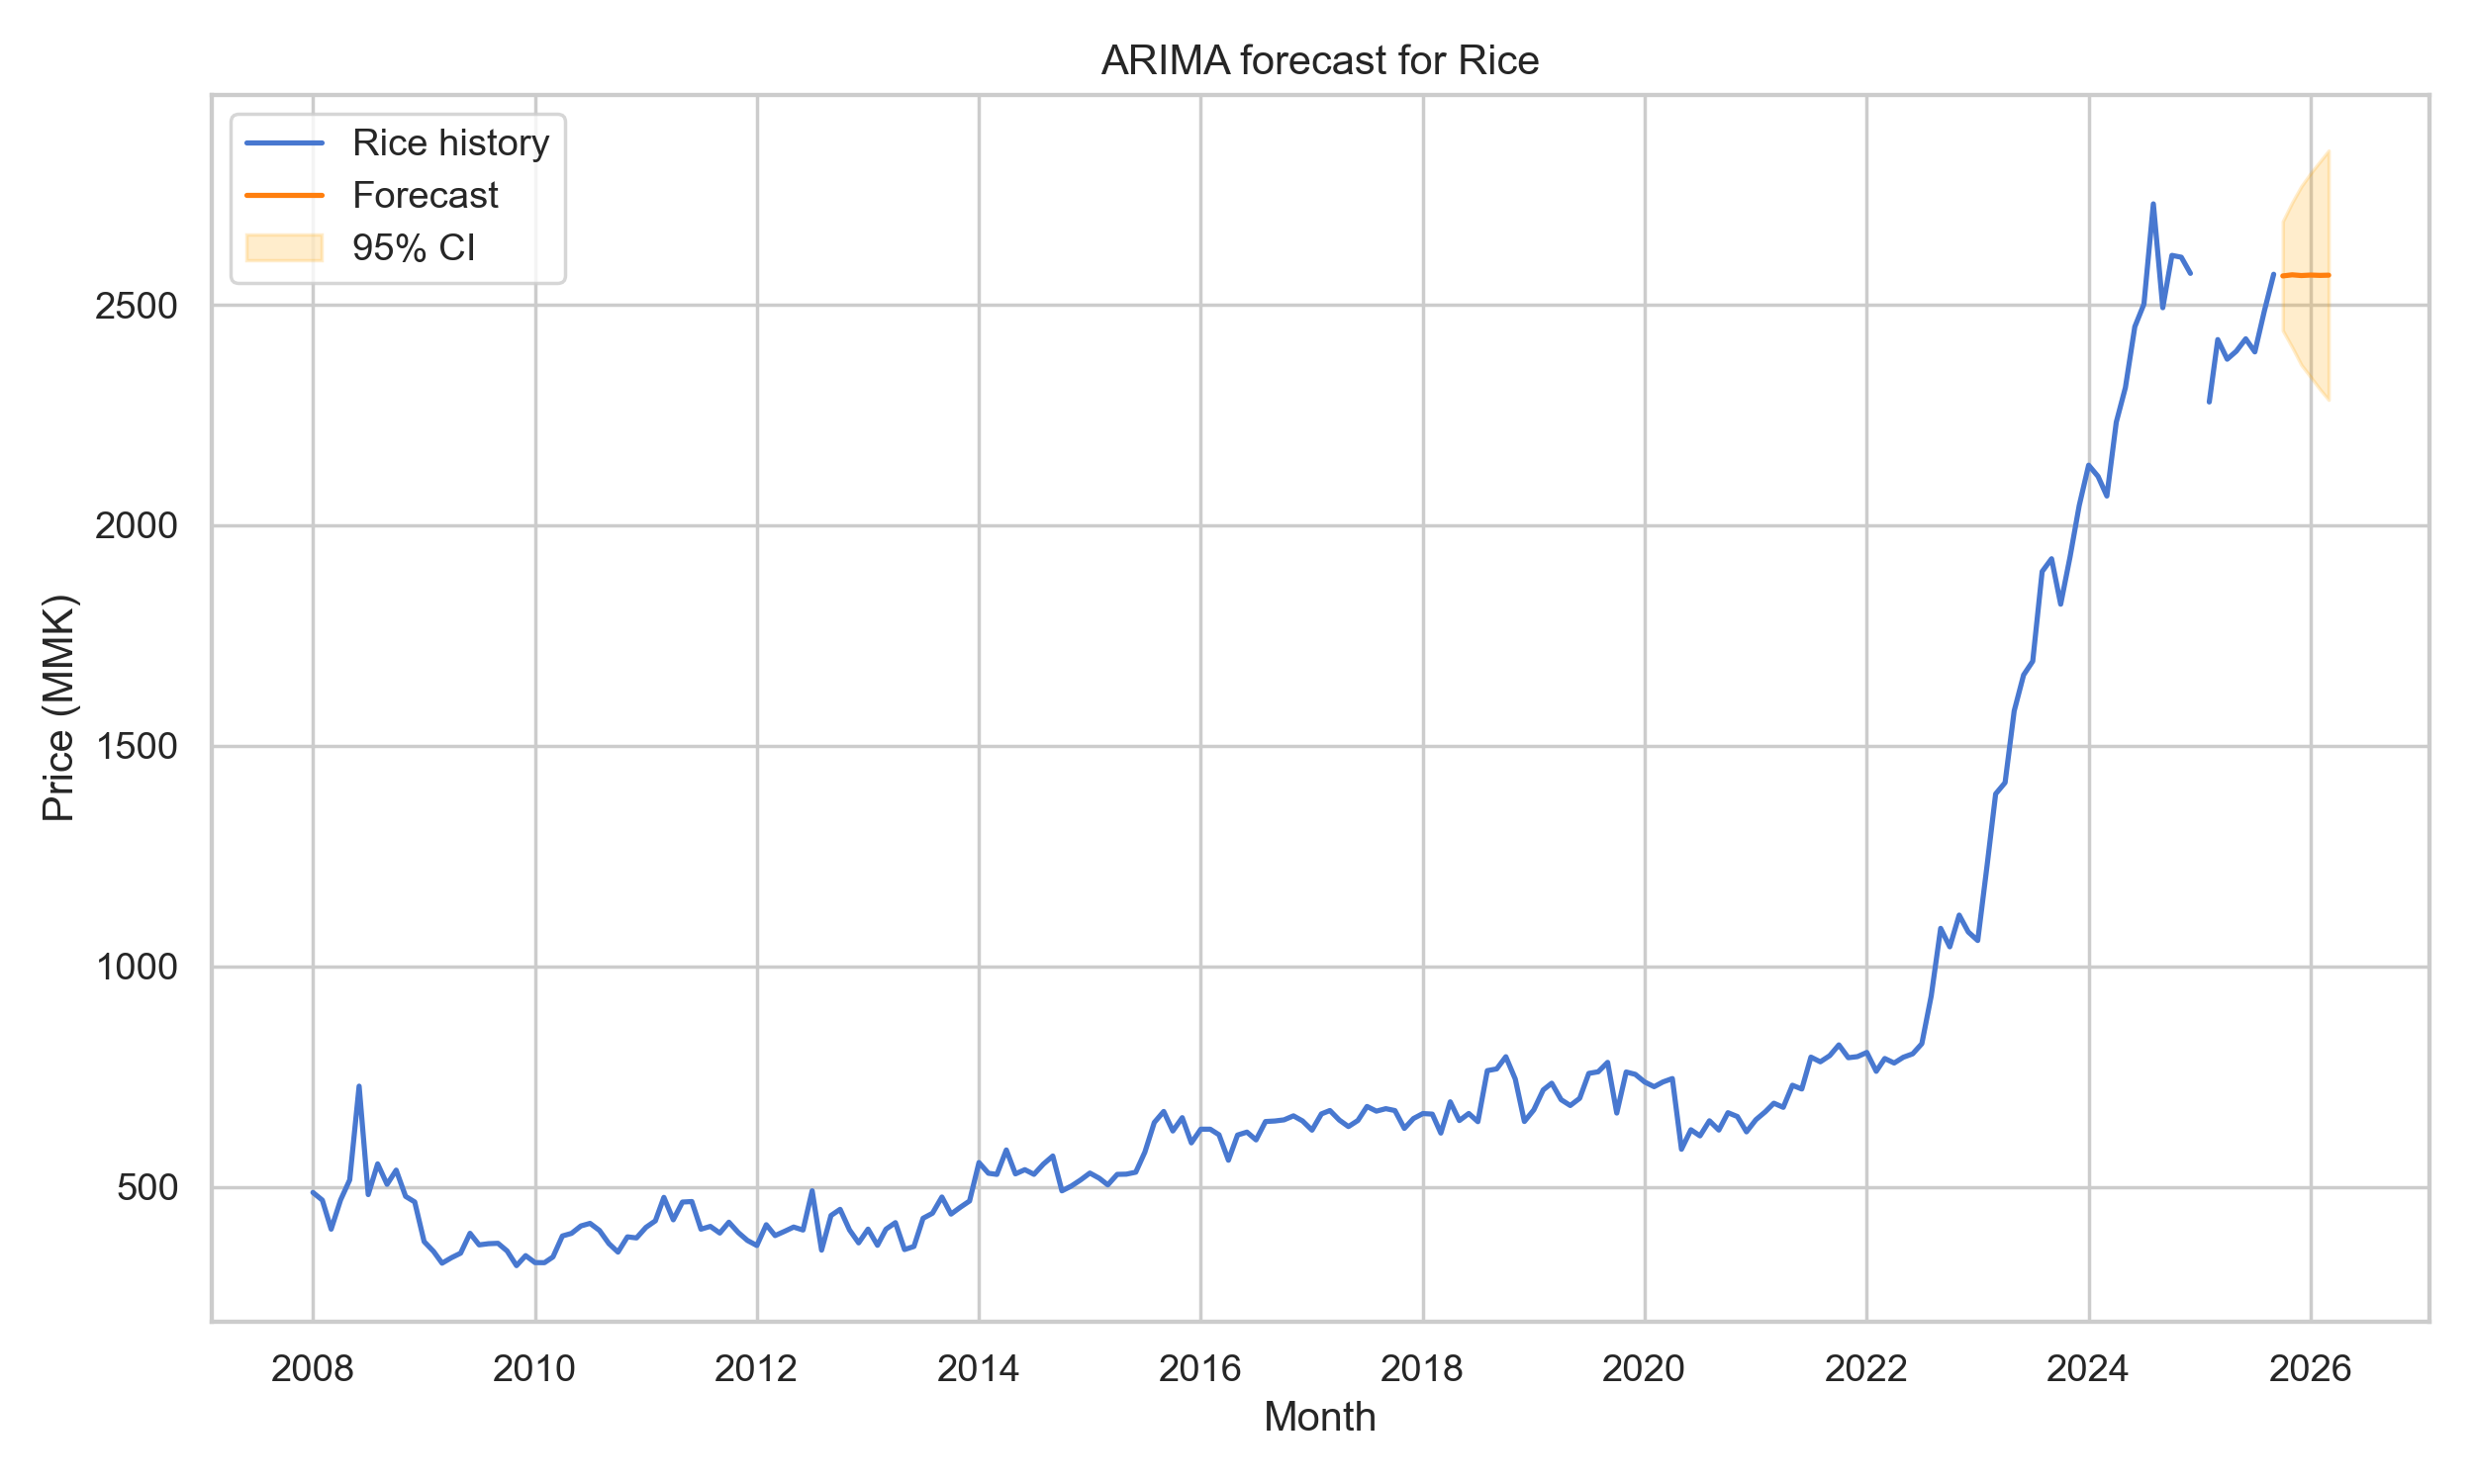

In [15]:

fc_df, paths = forecast_commodity(df, "Rice")
if not fc_df.empty:
    display(fc_df)
    for p in paths:
        display(Image(filename=p))
else:
    print('Not enough data to forecast')
